In [ ]:
#@title Загрузите необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import xgboost as xgb
from imblearn.over_sampling import SMOTE

Конечно, обратное распространение (backpropagation) состоит из нескольких этапов, включая вычисление градиентов функции потерь по параметрам сети. Да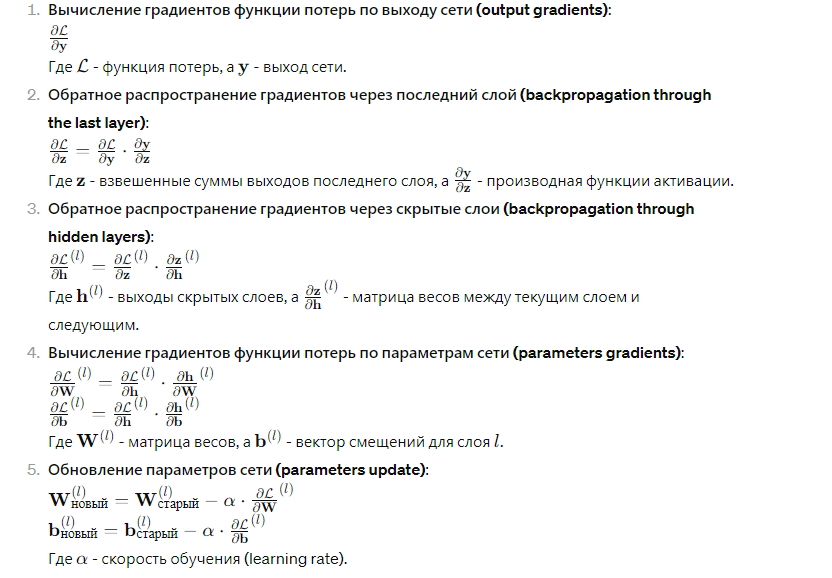вайте опишем каждый этап подробнее и выразим его в виде формул:

1. **Вычисление градиентов функции потерь по выходу сети (output gradients)**:
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{y}} $$
   Где \( \mathcal{L} \) - функция потерь, а \( \mathbf{y} \) - выход сети.

2. **Обратное распространение градиентов через последний слой (backpropagation through the last layer)**:
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{z}} = \frac{\partial \mathcal{L}}{\partial \mathbf{y}} \cdot \frac{\partial \mathbf{y}}{\partial \mathbf{z}} $$
   Где \( \mathbf{z} \) - взвешенные суммы выходов последнего слоя, а \( \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \) - производная функции активации.

3. **Обратное распространение градиентов через скрытые слои (backpropagation through hidden layers)**:
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{h}}^{(l)} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}}^{(l)} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{h}}^{(l)} $$
   Где \( \mathbf{h}^{(l)} \) - выходы скрытых слоев, а \( \frac{\partial \mathbf{z}}{\partial \mathbf{h}}^{(l)} \) - матрица весов между текущим слоем и следующим.

4. **Вычисление градиентов функции потерь по параметрам сети (parameters gradients)**:
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{W}}^{(l)} = \frac{\partial \mathcal{L}}{\partial \mathbf{h}}^{(l)} \cdot \frac{\partial \mathbf{h}}{\partial \mathbf{W}}^{(l)} $$
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{b}}^{(l)} = \frac{\partial \mathcal{L}}{\partial \mathbf{h}}^{(l)} \cdot \frac{\partial \mathbf{h}}{\partial \mathbf{b}}^{(l)} $$
   Где \( \mathbf{W}^{(l)} \) - матрица весов, а \( \mathbf{b}^{(l)} \) - вектор смещений для слоя \( l \).

5. **Обновление параметров сети (parameters update)**:
   $$ \mathbf{W}^{(l)}_{\text{новый}} = \mathbf{W}^{(l)}_{\text{старый}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}}^{(l)} $$
   $$ \mathbf{b}^{(l)}_{\text{новый}} = \mathbf{b}^{(l)}_{\text{старый}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}}^{(l)} $$
   Где \( \alpha \) - скорость обучения (learning rate).

Эти формулы описывают основные шаги обратного распространения, которые используются для обновления параметров нейронной сети в процессе обучения.


### Сеть без нормализаций

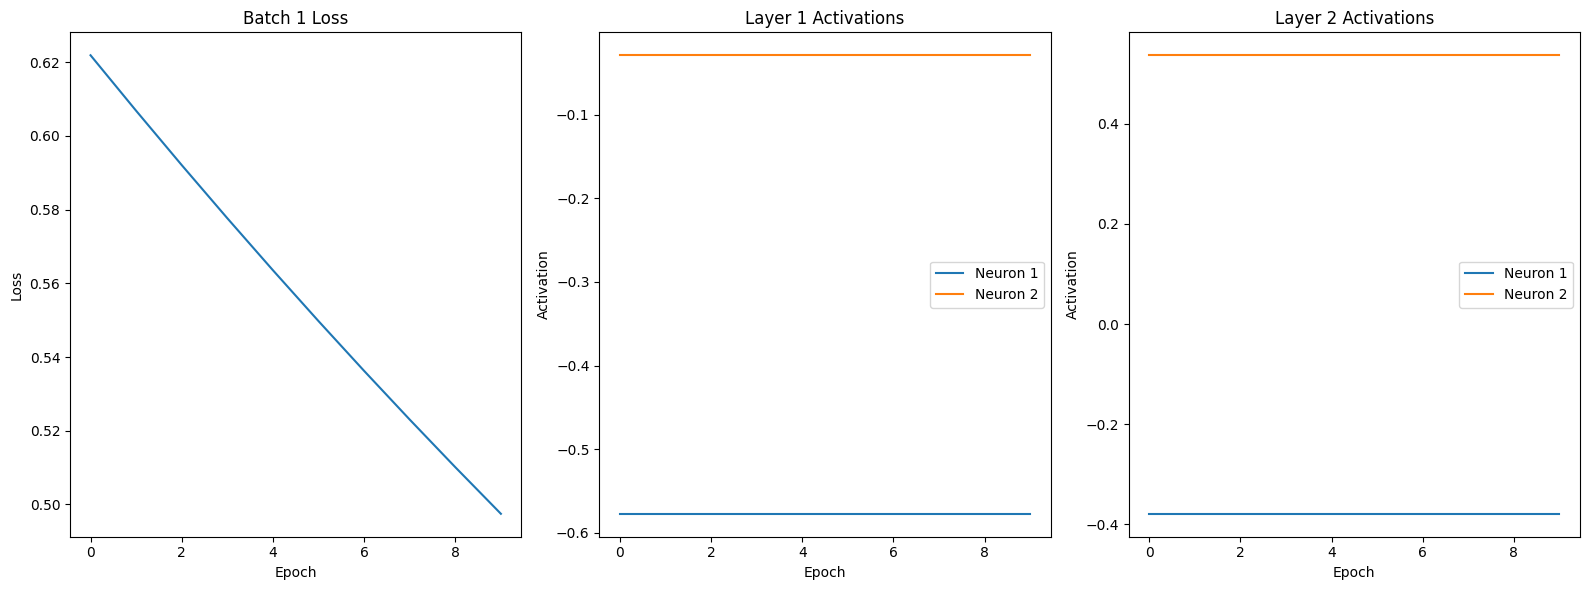

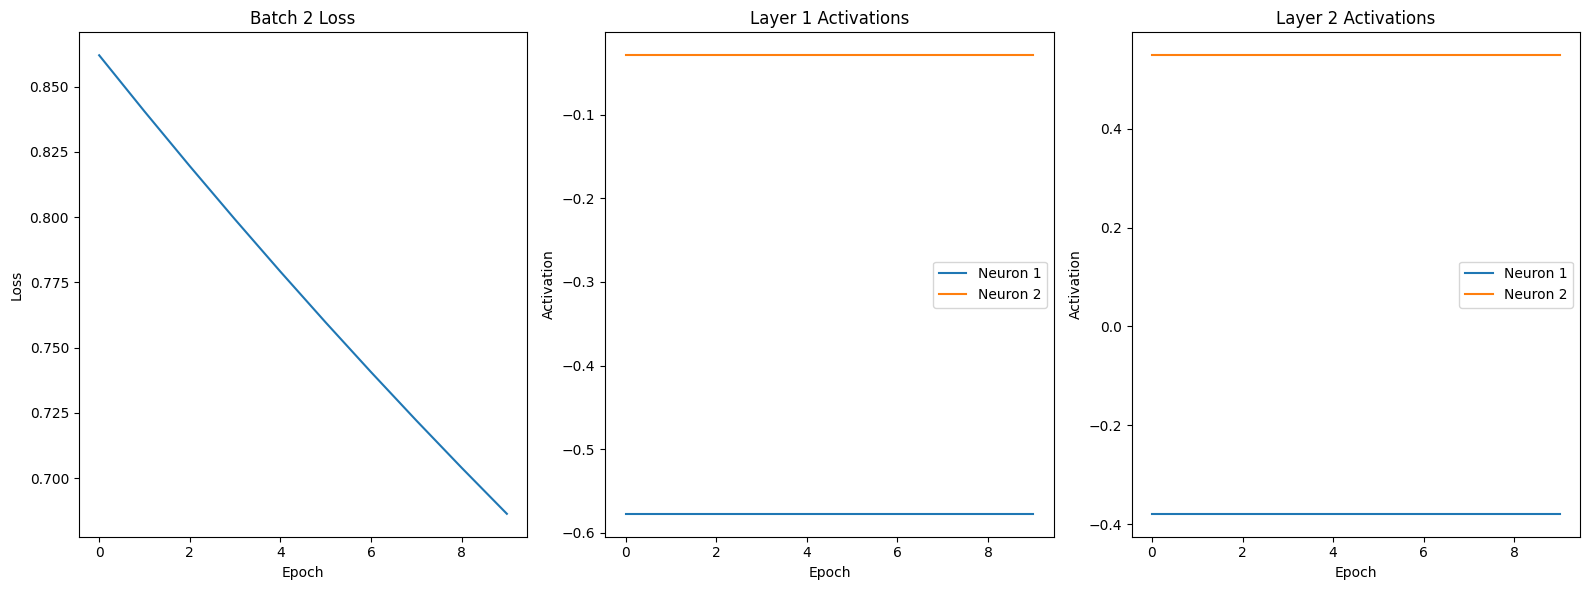

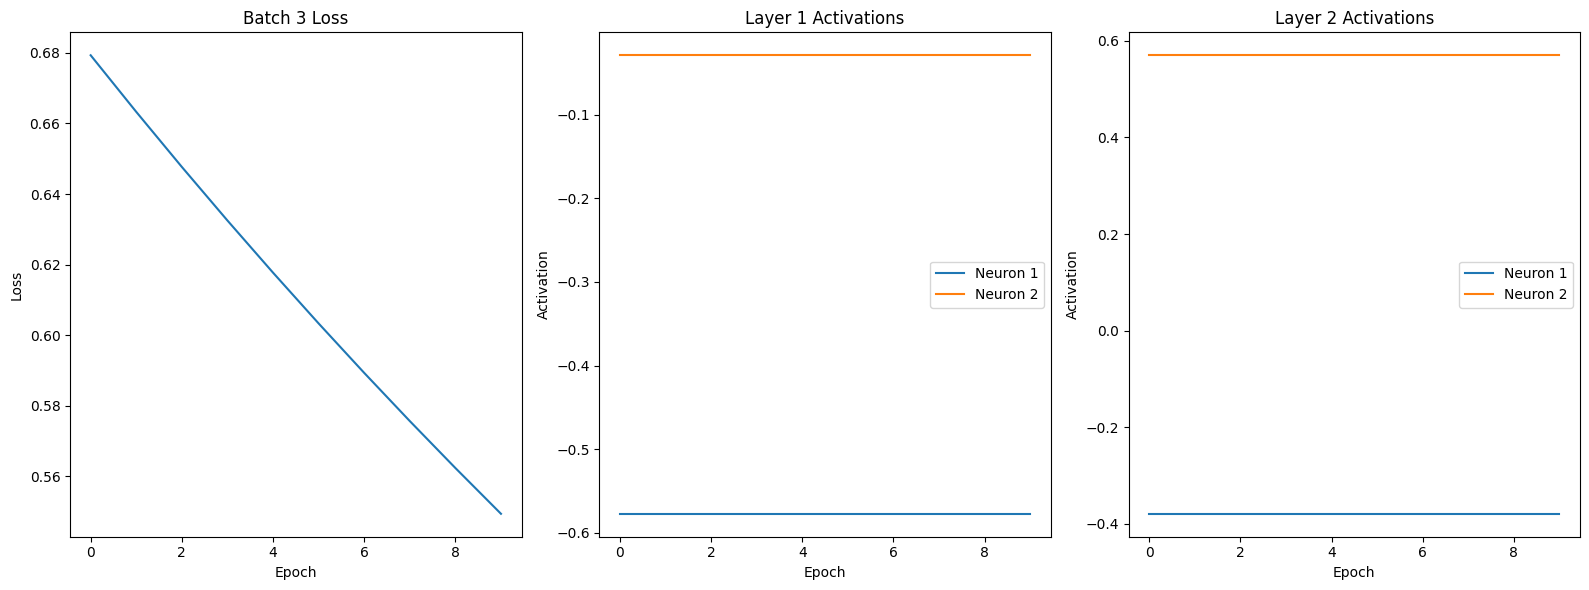

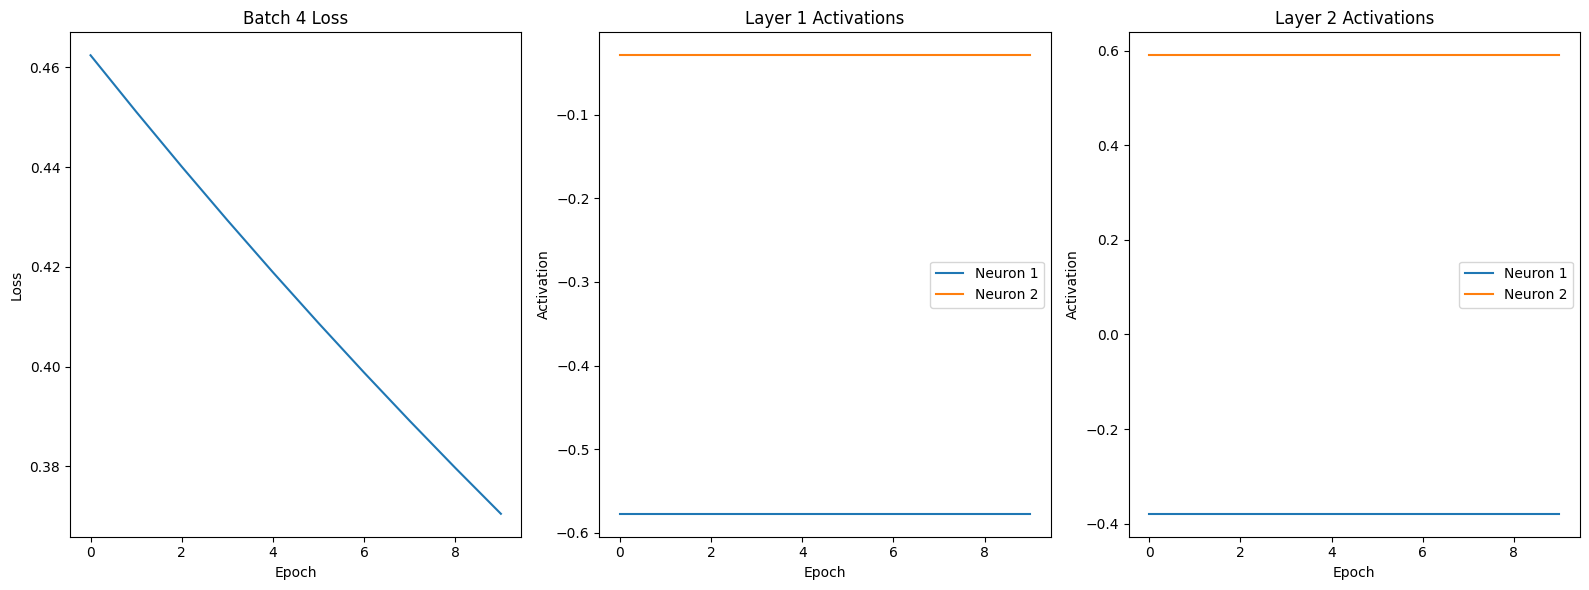

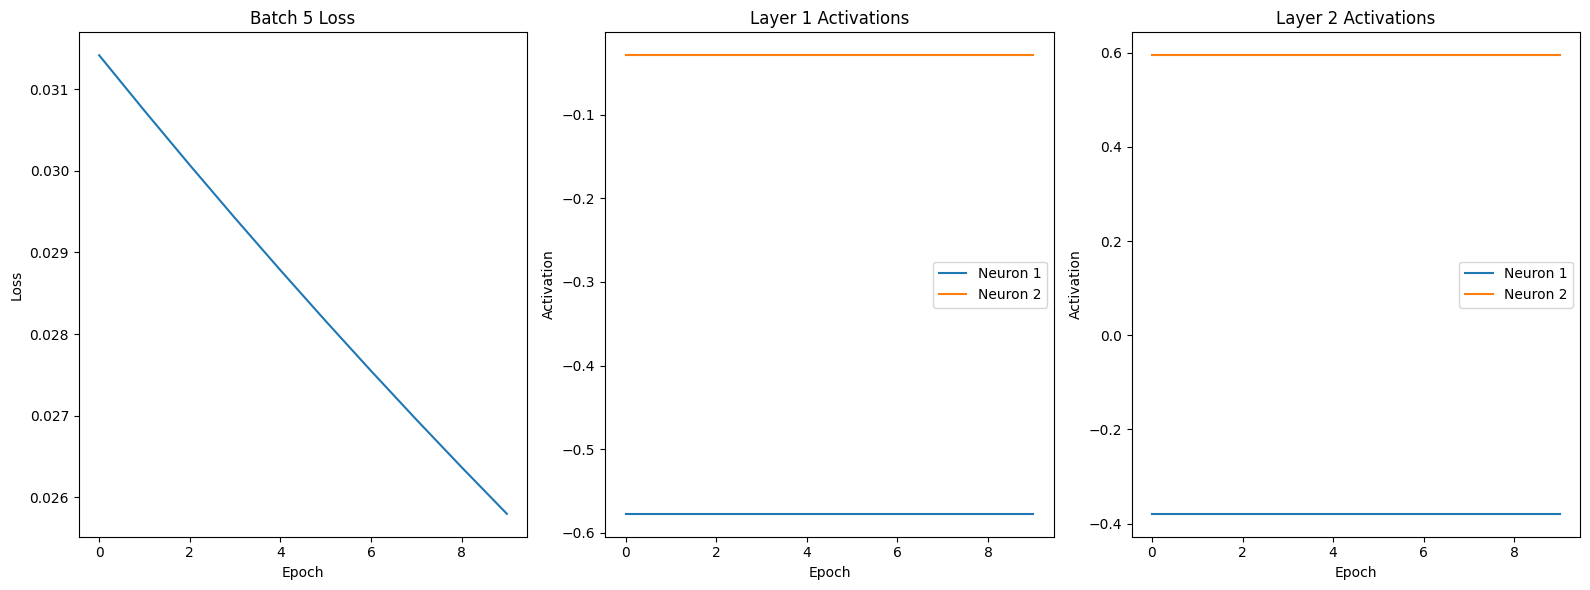

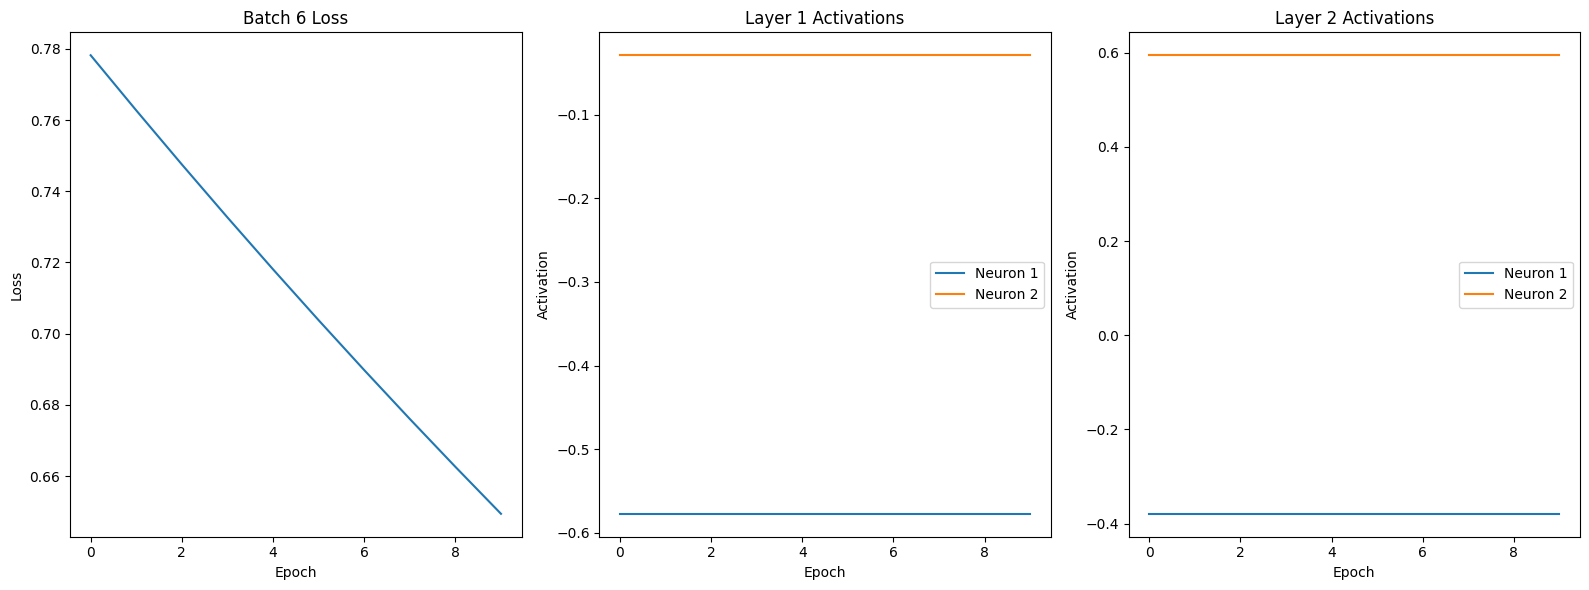

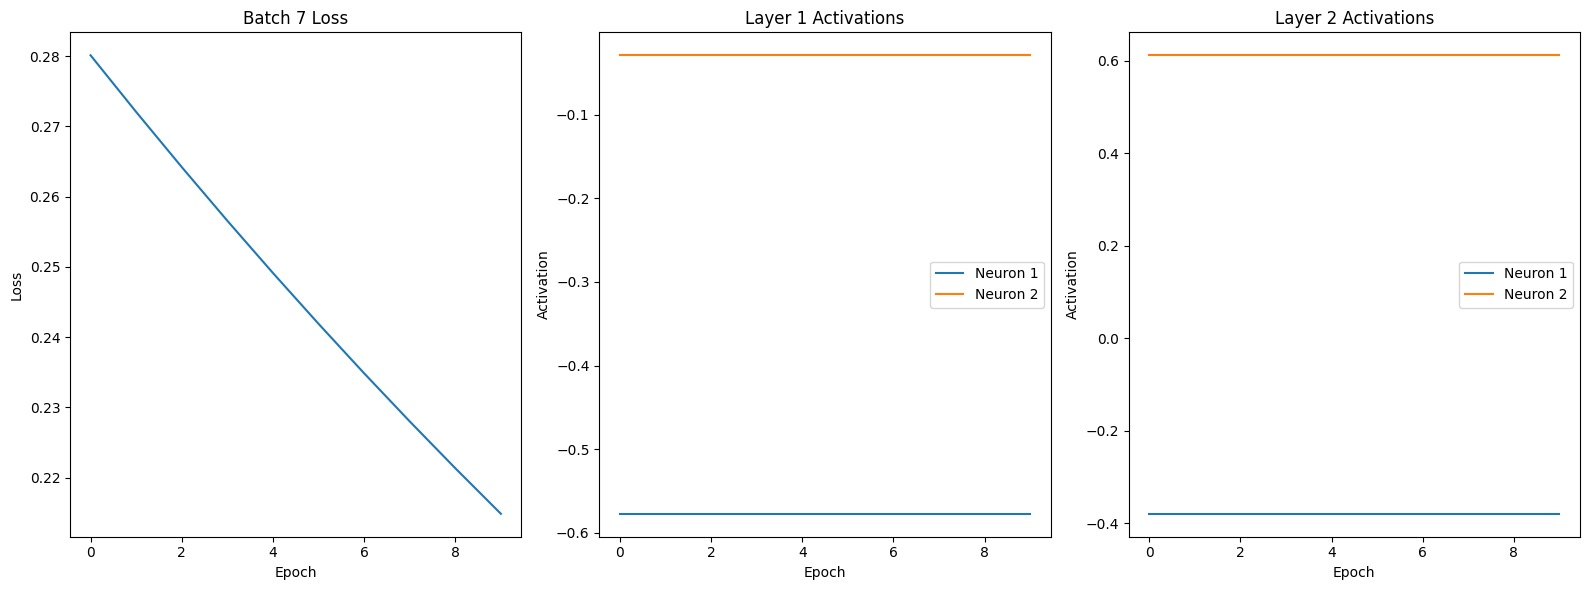

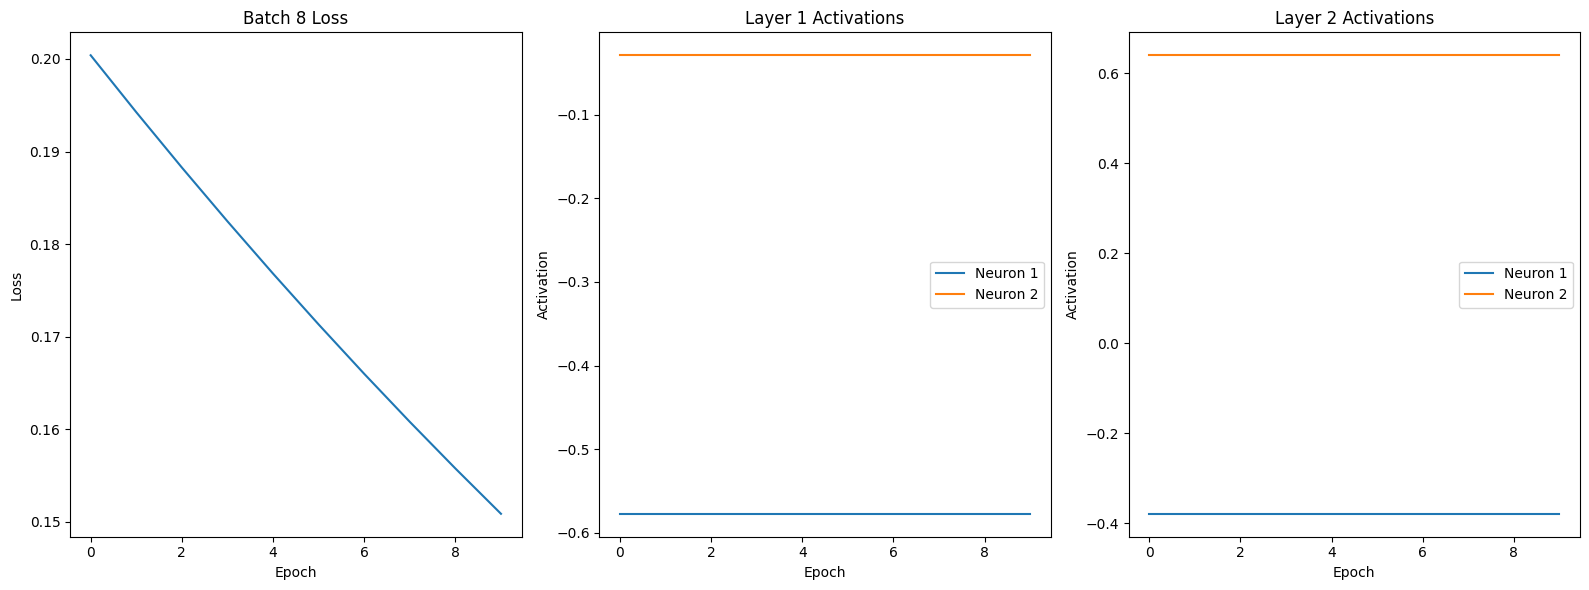

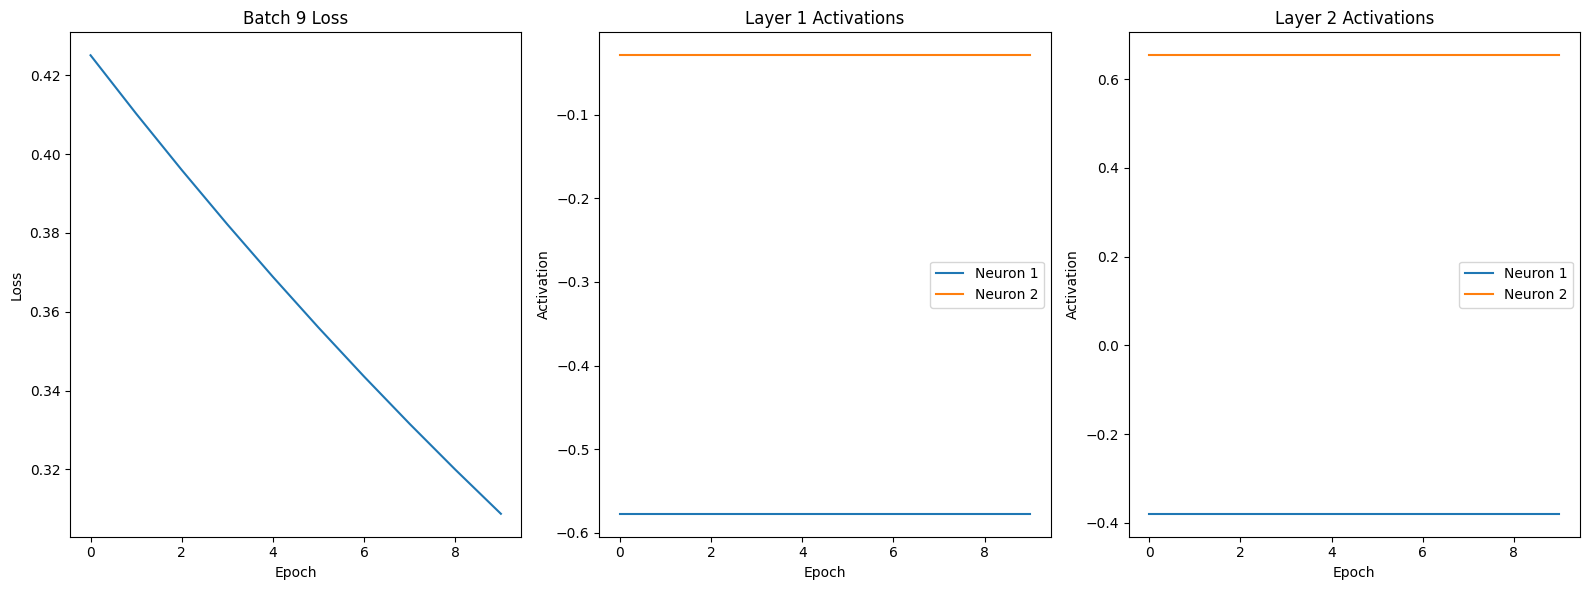

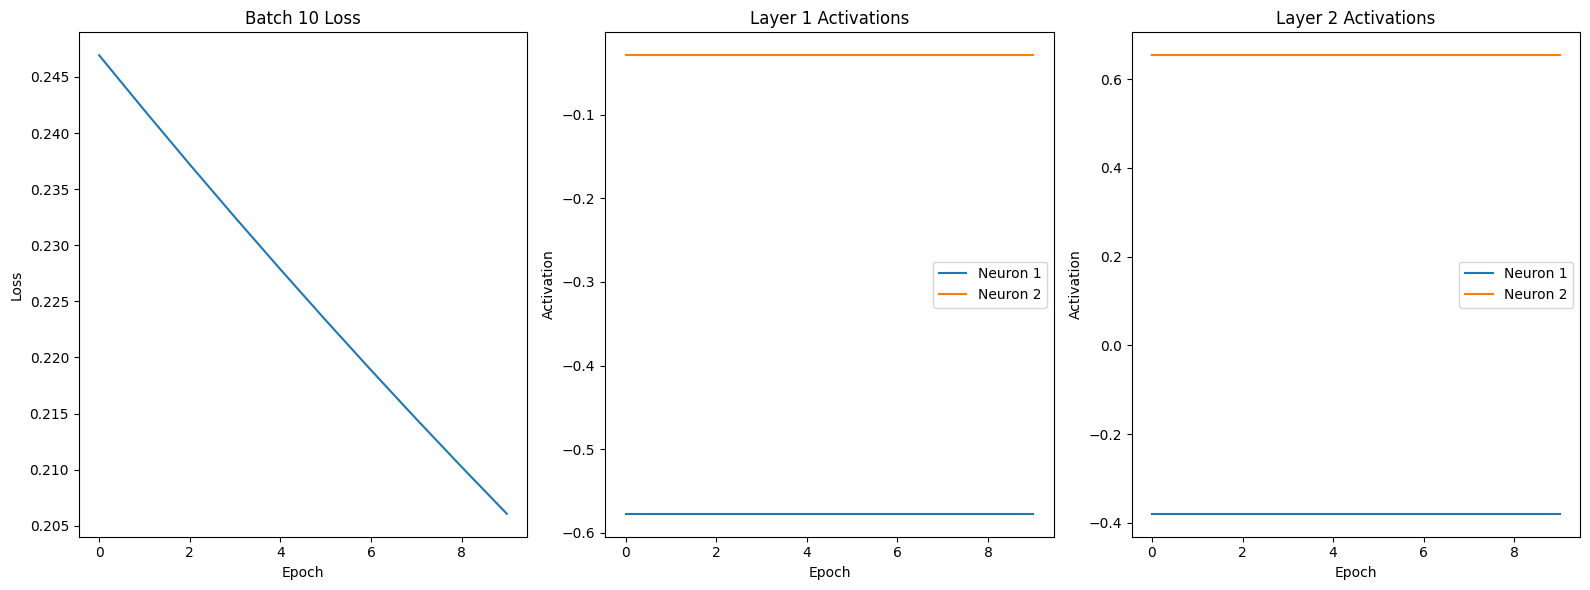

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(13)
import matplotlib.pyplot as plt

# Определение нейронной сети
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Функция обучения сети на одном батче
def train_on_batch(model, optimizer, criterion, batch):
    inputs, targets = batch
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    return loss.item(), outputs

# Функция для генерации примеров
def generate_examples():
    examples = []
    for i in range(10):
        inputs = torch.rand(2)
        targets = torch.rand(2)
        examples.append((inputs, targets))
    return examples

# Функция для обучения и записи изменений параметров и активаций
def train_and_plot():
    model = SimpleNet()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    examples = generate_examples()
    for i, batch in enumerate(examples):
        losses = []
        activations_layer1 = []
        activations_layer2 = []
        for epoch in range(10):
            loss, outputs = train_on_batch(model, optimizer, criterion, batch)
            losses.append(loss)
            activations_layer1.append(model.fc1.weight.detach().numpy())
            activations_layer2.append(model.fc2.weight.detach().numpy())

        # Построение графиков изменения функции потерь и активаций
        plt.figure(figsize=(16, 6))

        plt.subplot(1, 3, 1)
        plt.plot(losses)
        plt.title(f'Batch {i+1} Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(1, 3, 2)
        activations_layer1 = torch.tensor(activations_layer1).reshape(-1, 4)
        for neuron in range(2):
            plt.plot(activations_layer1[:, neuron], label=f'Neuron {neuron+1}')
        plt.title(f'Layer 1 Activations')
        plt.xlabel('Epoch')
        plt.ylabel('Activation')
        plt.legend()

        plt.subplot(1, 3, 3)
        activations_layer2 = torch.tensor(activations_layer2).reshape(-1, 4)
        for neuron in range(2):
            plt.plot(activations_layer2[:, neuron], label=f'Neuron {neuron+1}')
        plt.title(f'Layer 2 Activations')
        plt.xlabel('Epoch')
        plt.ylabel('Activation')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Запуск обучения и построения графиков
train_and_plot()


## Обычная сеть с нормализациями

self.fc1 = nn.Linear(2, 2):

Параметры = (2 * 2) + 2 = 6
self.ln1 = nn.LayerNorm(2):

Параметры = 2 * 2 = 4
self.fc2 = nn.Linear(2, 2):

Параметры = (2 * 2) + 2 = 6
self.ln2 = nn.LayerNorm(2):

Параметры = 2 * 2 = 4

______________________________________________________________________________

Для полносвязного слоя (nn.Linear):
Параметры = (количество входных признаков * количество выходных признаков) + количество выходных признаков (для смещения).

Для слоя нормализации (nn.LayerNorm):
Параметры = количество выходных признаков * 2 (для среднего и стандартного отклонения).

<ipython-input-22-ed19a5953e0c>:25: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



GIF сохранен в файл: rotation_animation.gif


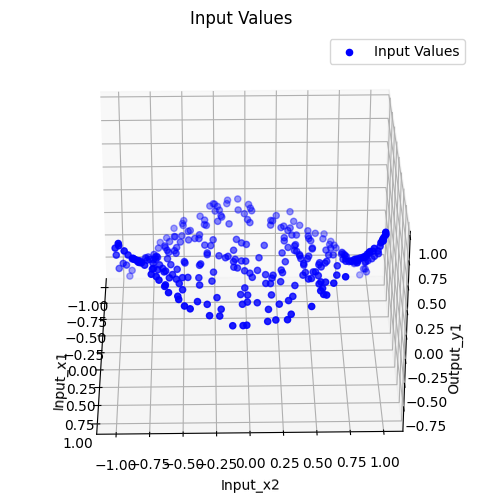

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import imageio
from pathlib import Path
import matplotlib.pyplot as plt
# Настройка 3D графика в Matplotlib
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Добавление точек 'Input_x1', 'Input_x2', 'Output_y1', 'Output_y2'
ax.scatter(df['Input_x1'], df['Input_x2'], df['Output_y1'], c='blue', marker='o', label='Input Values')
ax.set_title('Input Values')
ax.set_xlabel('Input_x1')
ax.set_ylabel('Input_x2')
ax.set_zlabel('Output_y1')
ax.legend()

# Создание списка кадров для анимации
frames = []
for angle in range(0, 360, 1):
    ax.view_init(30, angle)  # Изменение угла обзора камеры
    filename = f"frame_{angle:03d}.png"
    plt.savefig(filename)  # Сохранение текущего кадра как изображение PNG
    frames.append(imageio.imread(filename))  # Добавление текущего кадра в список

# Создание GIF анимации
gif_path = Path("rotation_animation.gif")
imageio.mimsave(gif_path, frames, fps=20)

# Удаление временных PNG файлов
for filename in Path(".").glob("frame_*.png"):
    filename.unlink()

print(f"GIF сохранен в файл: {gif_path}")

In [ ]:
# labels = ['Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear bias (2)', 'Linear bias (2)',
#           'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear bias_2 (2)', 'Linear bias_2 (2)']

In [ ]:
# labels = ['Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear layer (2, 2)', 'Linear bias (2)', 'Linear bias (2)',
#  'LayerNorm(2)', 'LayerNorm(2)', 'LayerNorm_mean(2)', 'LayerNorm_std(2)',
#  'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear layer_2 (2, 2)', 'Linear bias_2 (2)', 'Linear bias_2 (2)',
#  'LayerNorm_2(2)', 'LayerNorm_2(2)', 'LayerNorm_mean_2(2)', 'LayerNorm_std_2(2)']

In [ ]:
fig = px.scatter_3d(df, x='Input_x', y='Input_y', z='Output_y', title='Input Values')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Output_x', y='Output_y', z='Input_x', title='Input Values')
fig.show()

In [ ]:
df.describe()

Input_x       Input_y      Output_x      Output_y
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.503365      0.503261      0.698394      0.698862
std        0.288044      0.290075      0.109307      0.109051
min        0.000065      0.000037      0.447244      0.447248
25%        0.253621      0.252174      0.626237      0.625774
50%        0.505330      0.506590      0.706529      0.707684
75%        0.749432      0.753193      0.780005      0.779633
max        0.999889      0.999926      0.894410      0.894412

In [ ]:
df.apply(lambda x: model.forward(el[0]) )

In [ ]:
for el in train_data:
    outputs = model.forward(el[0])
    out +=

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

# def fn(l):
#   result = []
#   for el in [list(el.flatten()) for el in l]:
#     result += el
#   return result

tr = 2
weights=0

class SimpleNet(nn.Module):

  def __init__(self, n):
      super(SimpleNet, self).__init__()

      self.fc1 = nn.Linear(2, n)
      self.relu1 = nn.ReLU()
      self.batch1 = nn.BatchNorm1d(n)

      self.fc2 = nn.Linear(n, n)
      self.relu2 = nn.ReLU()
      self.batch2 = nn.BatchNorm1d(n)

      self.fc3 = nn.Linear(n, 2)
      self.relu3 = nn.ReLU()
      self.batch3 = nn.BatchNorm1d(2)

  def forward(self, x):
      x = self.fc1(x)
      x = self.relu1(x)
      x = self.batch1(x)
      x = self.fc2(x)
      x = self.relu2(x)
      x = self.batch2(x)
      x = self.fc3(x)
      x = self.relu3(x)
      x = self.batch3(x)
      return x

# Обучение нейронной сети
def train(model, criterion, optimizer, train_data, epochs=1, batch_size=1000):
    model.train()
    params = []
    all_weights = []
    losses = []
    for epoch in range(1):
        running_loss = 0.0
        for i in range(0, len(train_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            targets_batch = torch.stack(targets_batch)

            optimizer.zero_grad()

            outputs = model(inputs_batch)
            loss = criterion(outputs, targets_batch)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            weights = [param.data.numpy() for param in model.parameters()]
            all_weights += [(fn(weights))]

            # print(len(all_weights))
            # print(f"Epoch {epoch+1}/{epochs}, Loss: {weights}")
            # print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss}")


    return all_weights, losses


In [ ]:
# Определение класса динамической сети
class DynamicNet(nn.Module):
    def __init__(self, n, m):
        super(DynamicNet, self).__init__()

        layers = []
        # Первый слой
        layers.append(nn.Linear(2, n))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(n))

        # Промежуточные слои
        for _ in range(m - 2):
            layers.append(nn.Linear(n, n))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(n))

        # Последний слой
        layers.append(nn.Linear(n, 2))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(2))

        # Сохраняем слои в Sequential
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def validate(model, validation_data, criterion):
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for inputs, targets in validation_data:
            outputs = model(inputs.unsqueeze(0))
            loss = criterion(outputs, targets.unsqueeze(0))
            validation_loss += loss.item()
    return validation_loss / len(validation_data)

# Обучение нейронной сети с ранней остановкой
def train(model, criterion, optimizer, train_data, val_data, epochs=100, batch_size=1000, patience=3):
    model.train()
    params = []
    all_weights = []
    losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i in range(0, len(train_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            targets_batch = torch.stack(targets_batch)

            optimizer.zero_grad()
            outputs = model(inputs_batch)
            loss = criterion(outputs, targets_batch)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # weights = [param.data.numpy() for param in model.parameters()]
            # all_weights += [(fn(weights))]

        # Валидация после каждой эпохи
        val_loss = validate(model, val_data, criterion)
        val_losses.append(val_loss)

        # Проверка на улучшение валидационного качества
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f} {best_val_loss:.4}, Epochs_no_improve: {epochs_no_improve}")

        # Ранняя остановка
        if epochs_no_improve == patience:
            print("Early stopping triggered")
            break

    return all_weights, losses, val_losses


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error


def get_metrics(model, test_data):
  # Отключение режима обучения для модели
  model.eval()
  # Прогнозирование на тестовой выборке
  test_predictions = []
  test_targets = []
  batch_size=10

  # Прогнозирование на тестовой выборке
  with torch.no_grad():
      for i in range(0, len(test_data), batch_size):
              inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
              inputs_batch = torch.stack(inputs_batch)
              # targets_batch = torch.stack(targets_batch)
              predictions = model(inputs_batch)

              test_predictions += [el for el in predictions.numpy()]
              test_targets += [el.numpy() for el in targets_batch]

  # Преобразование предсказаний и истинных значений в numpy массив
  test_predictions = np.array(test_predictions)
  test_targets = np.array(test_targets)

  # Вычисление метрик
  mae = mean_absolute_error(test_targets, test_predictions)
  rmse = root_mean_squared_error(test_targets, test_predictions)
  return mae, rmse

In [ ]:
# Генерация данных
train_data = generate_examples(100000)
val_data = generate_examples(10000)
# Генерация тестовой выборки
test_data = generate_examples(1000)

dict_metrics = {}

# Обучение модели
for lays in [3,5,7,9, 11]:
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    model = DynamicNet(elements, lays)
    print(f'model with {lays} lays and {elements} elements')
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)
    dict_metrics[f'model_{lays}_{elements}'] = {}
    dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
    dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
    dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
    # dict_metrics[f'model_{lays}_{elements}']['model'] = model.copy()
    dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
    dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
    print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

model with 3 lays and 10 elements
Epoch 1/100, Loss: 108.8296, Val Loss: 0.5307 0.5307, Epochs_no_improve: 0
Epoch 2/100, Loss: 26.7495, Val Loss: 0.1211 0.1211, Epochs_no_improve: 0
Epoch 3/100, Loss: 7.6914, Val Loss: 0.0599 0.05987, Epochs_no_improve: 0
Epoch 4/100, Loss: 4.5344, Val Loss: 0.0352 0.03522, Epochs_no_improve: 0
Epoch 5/100, Loss: 2.6624, Val Loss: 0.0182 0.01822, Epochs_no_improve: 0
Epoch 6/100, Loss: 1.4768, Val Loss: 0.0107 0.01072, Epochs_no_improve: 0
Epoch 7/100, Loss: 0.8895, Val Loss: 0.0066 0.006598, Epochs_no_improve: 0
Epoch 8/100, Loss: 0.5476, Val Loss: 0.0040 0.004011, Epochs_no_improve: 0
Epoch 9/100, Loss: 0.3995, Val Loss: 0.0026 0.002572, Epochs_no_improve: 0
Epoch 10/100, Loss: 0.3473, Val Loss: 0.0021 0.002112, Epochs_no_improve: 0
Epoch 11/100, Loss: 0.3103, Val Loss: 0.0017 0.001667, Epochs_no_improve: 0
Epoch 12/100, Loss: 0.2833, Val Loss: 0.0014 0.001395, Epochs_no_improve: 0
Epoch 13/100, Loss: 0.2629, Val Loss: 0.0012 0.001152, Epochs_no_imp

In [ ]:
# Генерация данных
train_data = generate_examples(100000)
val_data = generate_examples(10000)
# Генерация тестовой выборки
test_data = generate_examples(1000)

dict_metrics = {}

# Обучение модели
for lays in [3,5,7,9, 11]:
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    model = DynamicNet(elements, lays)
    print(f'model with {lays} lays and {elements} elements')
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)
    dict_metrics[f'model_{lays}_{elements}'] = {}
    dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
    dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
    dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
    dict_metrics[f'model_{lays}_{elements}']['model'] = model.copy()
    dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
    dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
    print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

model with 3 lays and 10 elements
Epoch 1/100, Loss: 124.0232, Val Loss: 1.1498 1.15, Epochs_no_improve: 0
Epoch 2/100, Loss: 106.5808, Val Loss: 0.9980 0.998, Epochs_no_improve: 0
Epoch 3/100, Loss: 91.8547, Val Loss: 0.8572 0.8572, Epochs_no_improve: 0
Epoch 4/100, Loss: 79.5154, Val Loss: 0.7448 0.7448, Epochs_no_improve: 0
Epoch 5/100, Loss: 69.2768, Val Loss: 0.6496 0.6496, Epochs_no_improve: 0
Epoch 6/100, Loss: 60.8904, Val Loss: 0.5705 0.5705, Epochs_no_improve: 0
Epoch 7/100, Loss: 54.1150, Val Loss: 0.5101 0.5101, Epochs_no_improve: 0
Epoch 8/100, Loss: 48.7300, Val Loss: 0.4641 0.4641, Epochs_no_improve: 0
Epoch 9/100, Loss: 44.5278, Val Loss: 0.4248 0.4248, Epochs_no_improve: 0
Epoch 10/100, Loss: 41.3058, Val Loss: 0.3965 0.3965, Epochs_no_improve: 0
Epoch 11/100, Loss: 38.8908, Val Loss: 0.3763 0.3763, Epochs_no_improve: 0
Epoch 12/100, Loss: 37.1215, Val Loss: 0.3627 0.3627, Epochs_no_improve: 0
Epoch 13/100, Loss: 35.8513, Val Loss: 0.3516 0.3516, Epochs_no_improve: 0
E

KeyboardInterrupt: 

In [ ]:
# Генерация данных
train_data = generate_examples(100000)
val_data = generate_examples(10000)
# Генерация тестовой выборки
test_data = generate_examples(1000)

dict_metrics = {}

# Обучение модели
for lays in [3,5,7,9,11]:
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    model = DynamicNet(elements, lays)
    print(f'model with {lays} lays and {elements} elements')
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)
    dict_metrics[f'model_{lays}_{elements}'] = {}
    dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
    dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
    dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
    dict_metrics[f'model_{lays}_{elements}']['model'] = model.copy()
    dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
    dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
    print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

model with 3 lays and 10 elements
Epoch 1/100, Loss: 81.7591, Val Loss: 0.7105 0.7105, Epochs_no_improve: 0
Epoch 2/100, Loss: 49.9912, Val Loss: 0.4248 0.4248, Epochs_no_improve: 0
Epoch 3/100, Loss: 35.2260, Val Loss: 0.2977 0.2977, Epochs_no_improve: 0
Epoch 4/100, Loss: 26.5467, Val Loss: 0.2217 0.2217, Epochs_no_improve: 0
Epoch 5/100, Loss: 19.6410, Val Loss: 0.1639 0.1639, Epochs_no_improve: 0
Epoch 6/100, Loss: 13.7554, Val Loss: 0.1071 0.1071, Epochs_no_improve: 0
Epoch 7/100, Loss: 8.0874, Val Loss: 0.0615 0.06151, Epochs_no_improve: 0
Epoch 8/100, Loss: 5.1793, Val Loss: 0.0413 0.04134, Epochs_no_improve: 0
Epoch 9/100, Loss: 3.4474, Val Loss: 0.0273 0.02735, Epochs_no_improve: 0
Epoch 10/100, Loss: 2.2778, Val Loss: 0.0179 0.01792, Epochs_no_improve: 0
Epoch 11/100, Loss: 1.5001, Val Loss: 0.0117 0.01173, Epochs_no_improve: 0
Epoch 12/100, Loss: 0.9970, Val Loss: 0.0078 0.007823, Epochs_no_improve: 0
Epoch 13/100, Loss: 0.6819, Val Loss: 0.0054 0.0054, Epochs_no_improve: 0


In [ ]:
np.vstack((np.array(targets_batch),np.array(targets_batch)))

array([[ 2.0430069e-01,  2.2448735e-01],
       [-1.6833071e-04, -4.5120565e-04],
       [ 3.1815397e-03, -2.0276465e-02],
       [ 6.0475539e-02,  5.7453346e-02],
       [ 9.6356340e-02, -1.3710803e-01],
       [-5.0373441e-01, -3.6978811e-01],
       [ 3.3476047e-02, -7.2542585e-02],
       [-1.0869822e-01, -2.1377574e-01],
       [ 1.5524959e-03,  1.4395584e-02],
       [-8.9695022e-02,  1.8823396e-02],
       [ 2.0430069e-01,  2.2448735e-01],
       [-1.6833071e-04, -4.5120565e-04],
       [ 3.1815397e-03, -2.0276465e-02],
       [ 6.0475539e-02,  5.7453346e-02],
       [ 9.6356340e-02, -1.3710803e-01],
       [-5.0373441e-01, -3.6978811e-01],
       [ 3.3476047e-02, -7.2542585e-02],
       [-1.0869822e-01, -2.1377574e-01],
       [ 1.5524959e-03,  1.4395584e-02],
       [-8.9695022e-02,  1.8823396e-02]], dtype=float32)

In [ ]:
predictions.numpy()

array([[-0.03640663,  0.01406116],
       [ 0.09195152, -0.03183802],
       [ 0.05439887,  0.12588158],
       [ 0.01385713,  0.01536543],
       [-0.3497934 ,  0.52513486],
       [ 0.00071393, -0.00940033],
       [-0.2248198 ,  0.13480605],
       [-0.07684968,  0.09682266],
       [ 0.30122954, -0.13192962],
       [ 0.0022224 ,  0.00141715]], dtype=float32)

In [ ]:
# Отключение режима обучения для модели
model.eval()
# Прогнозирование на тестовой выборке
# test_predictions = np.array([[],[]])
# test_targets = np.array([[],[]])
batch_size=10


inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
inputs_batched = torch.stack(inputs_batch)
# targets_batch = torch.stack(targets_batch)
with torch.no_grad():
  predictions = model(inputs_batched)

test_predictions = predictions.numpy()
test_targets = np.array(targets_batch)

# Прогнозирование на тестовой выборке
with torch.no_grad():
    for i in range(batch_size, len(test_data), batch_size):
        inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
        inputs_batched = torch.stack(inputs_batch)
        # targets_batch = torch.stack(targets_batch)
        predictions = model(inputs_batched)

        test_predictions = np.vstack((test_predictions, predictions.numpy()))
        test_targets = np.vstack((test_targets, np.array(targets_batch)))

# # Преобразование предсказаний и истинных значений в numpy массив
# test_predictions = np.array(test_predictions)
# test_targets = np.array(test_targets)

# Вычисление метрик
mae = mean_absolute_error(test_targets, test_predictions)
rmse = mean_squared_error(test_targets, test_predictions, squared=False)

In [ ]:
mae, rmse

(0.006486103, 0.01078153)

In [ ]:
np.sqrt(mae)

0.08053634

In [ ]:
test_predictions = np.vstack((np.array([[None,None]]), predictions.numpy()))
test_predictions

array([[None, None],
       [0.19526000320911407, 0.21545396745204926],
       [-0.00099766138009727, 0.0023387838155031204],
       [0.004427846521139145, -0.025478236377239227],
       [0.048801716417074203, 0.05631409212946892],
       [0.10324885696172714, -0.14666330814361572],
       [-0.5239222645759583, -0.3783884048461914],
       [0.03161390498280525, -0.07316364347934723],
       [-0.11052030324935913, -0.20799368619918823],
       [0.0027013712096959352, 0.016022348776459694],
       [-0.09146369993686676, 0.0230573620647192]], dtype=object)

### Линейные Хит мапы

In [ ]:
mae_list = []
rmse_list = []
for lays in [3,5,7,9]:
  mae_vector = []
  rmse_vector = []
  for elements in [10, 20, 30, 40, 50, 70]:
    mae_vector += [dict_metrics[el]['metrics'][0] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
    rmse_vector += [dict_metrics[el]['metrics'][1] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
  mae_list += [mae_vector]
  rmse_list += [rmse_vector]

In [ ]:
np.array(mae_list) <= np.array(rmse_list)

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [ ]:
mae_list

[[0.01967936, 0.022168033, 0.011256542, 0.015292379, 0.019926395, 0.019507766],
 [0.021241138, 0.021164473, 0.025508625, 0.020076163, 0.02214841, 0.041771688],
 [0.029700946, 0.034628436, 0.017791722, 0.01921957, 0.036553465, 0.01704329],
 [0.034488555, 0.02222186, 0.022813998, 0.028316606, 0.03324141, 0.02267668]]

In [ ]:
rmse_list

[[0.025976714,
  0.028836299,
  0.014522247,
  0.021552214,
  0.025660295,
  0.025282592],
 [0.026119199, 0.02888038, 0.033067025, 0.028583355, 0.030088566, 0.060652666],
 [0.04138174, 0.048473164, 0.02393119, 0.025021493, 0.050761454, 0.02351237],
 [0.048266288, 0.0284324, 0.029150099, 0.04211785, 0.046922244, 0.028678782]]

In [ ]:
mae_list = []
rmse_list = []
for lays in [3,5,7,9, 11]:
  mae_vector = []
  rmse_vector = []
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    mae_vector += [dict_metrics[el]['metrics'][0] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
    rmse_vector += [dict_metrics[el]['metrics'][1] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
  mae_list += [mae_vector]
  rmse_list += [rmse_vector]

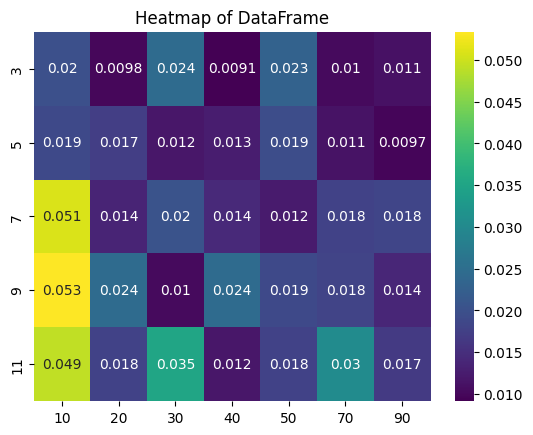

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=rmse_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

In [ ]:
def df_to_latex_colored(df):
    latex_code = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|" + "c|" * (df.shape[1] + 1) + "}\n\\hline\n"
    latex_code += " & " + " & ".join(map(str, df.columns)) + " \\\\\n\\hline\n"

    # Нормализуем значения для цветовой шкалы
    min_val, max_val = df.values.min(), df.values.max()
    norm_df = (df - min_val) / (max_val - min_val)

    # Добавляем строки таблицы с раскраской ячеек
    for idx, row in norm_df.iterrows():
        latex_code += str(idx)
        for val, orig_val in zip(row, df.loc[idx]):
            color = int(255 * (1 - val))  # Чем выше значение, тем светлее цвет
            latex_code += f" & \\cellcolor[RGB]{{255,{color},{color}}}{orig_val:.2f}"
        latex_code += " \\\\\n\\hline\n"

    latex_code += "\\end{tabular}\n\\caption{RMSE values with color gradient.}\n\\end{table}"
    return latex_code

df = pd.DataFrame(data=rmse_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])

# Печать LaTeX-кода для таблицы
print(df_to_latex_colored(df))

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
 & 10 & 20 & 30 & 40 & 50 & 70 & 90 \\
\hline
3 & \cellcolor[RGB]{255,192,192}0.02 & \cellcolor[RGB]{255,250,250}0.01 & \cellcolor[RGB]{255,166,166}0.02 & \cellcolor[RGB]{255,255,255}0.01 & \cellcolor[RGB]{255,175,175}0.02 & \cellcolor[RGB]{255,249,249}0.01 & \cellcolor[RGB]{255,243,243}0.01 \\
\hline
5 & \cellcolor[RGB]{255,198,198}0.02 & \cellcolor[RGB]{255,208,208}0.02 & \cellcolor[RGB]{255,239,239}0.01 & \cellcolor[RGB]{255,234,234}0.01 & \cellcolor[RGB]{255,195,195}0.02 & \cellcolor[RGB]{255,242,242}0.01 & \cellcolor[RGB]{255,251,251}0.01 \\
\hline
7 & \cellcolor[RGB]{255,14,14}0.05 & \cellcolor[RGB]{255,229,229}0.01 & \cellcolor[RGB]{255,189,189}0.02 & \cellcolor[RGB]{255,225,225}0.01 & \cellcolor[RGB]{255,236,236}0.01 & \cellcolor[RGB]{255,204,204}0.02 & \cellcolor[RGB]{255,202,202}0.02 \\
\hline
9 & \cellcolor[RGB]{255,0,0}0.05 & \cellcolor[RGB]{255,167,167}0.02 & \cellcolor[RGB]{255,248,248}0.01 & \cellcolo

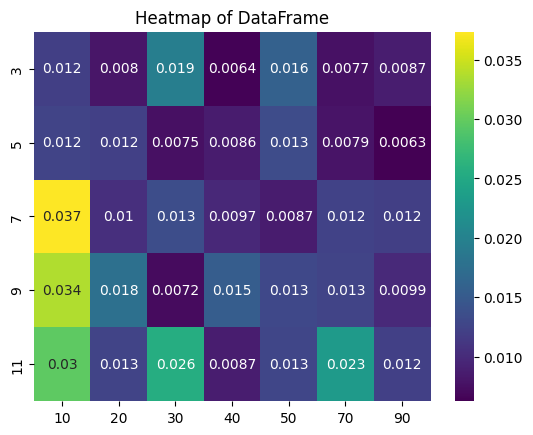

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=mae_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

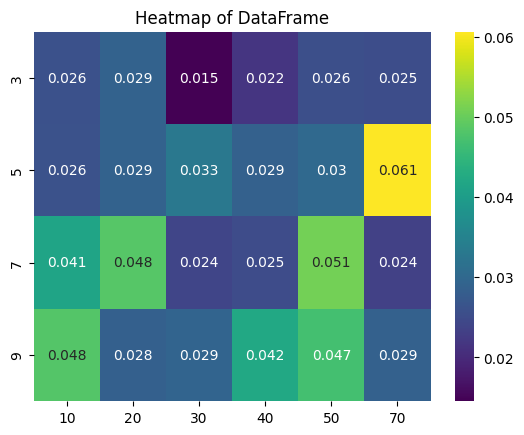

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=rmse_list, index =[3,5,7,9], columns=[10, 20, 30, 40, 50, 70])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

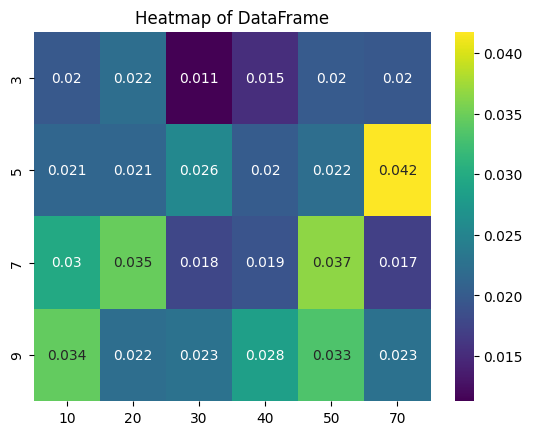

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=mae_list, index =[3,5,7,9], columns=[10, 20, 30, 40, 50, 70])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

### Не линейные хит мапы

In [ ]:
mae_list = []
rmse_list = []
for lays in [3,5,7,9, 11]:
  mae_vector = []
  rmse_vector = []
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    mae_vector += [dict_metrics[el]['metrics'][0] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
    rmse_vector += [dict_metrics[el]['metrics'][1] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
  mae_list += [mae_vector]
  rmse_list += [rmse_vector]

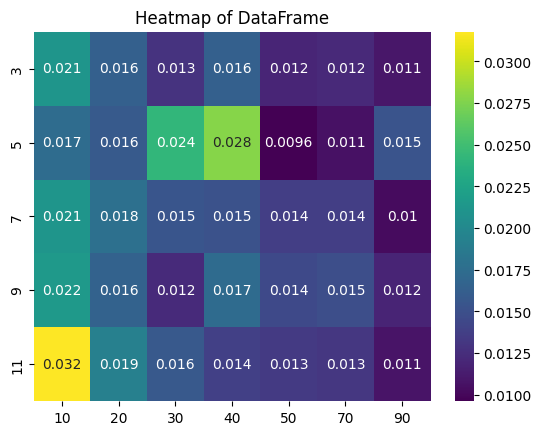

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=rmse_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

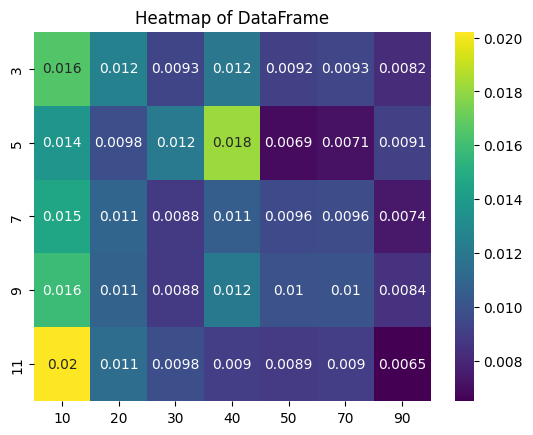

In [ ]:
import seaborn as sns
df = pd.DataFrame(data=mae_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

### Custom education method

## Картирование

как увеличение числа параметров \( N \) и объема данных \( D \) влияет на производительность модели \( P \). Если производительность модели выражается как функция от количества параметров и объема данных по степенному закону:

$$
P(N, D) = A \cdot N^\alpha \cdot D^\beta
$$

In [ ]:
train_data[0][0]

tensor([ 0.8101, -0.7496])

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


import torch
import torch.nn as nn

class FlexibleBatchNorm(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True):
        """
        Flexible BatchNorm that handles both training and inference modes properly.

        Args:
            num_features: Number of features/channels
            eps: Small constant for numerical stability
            momentum: Momentum factor for running statistics
            affine: Boolean indicating if learnable affine parameters are used
            track_running_stats: Boolean indicating if running statistics should be tracked
        """
        super(FlexibleBatchNorm, self).__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.affine = affine
        self.track_running_stats = track_running_stats

        # Создаем BatchNorm1d для 2D входных данных
        self.batchnorm1d = nn.BatchNorm1d(
            num_features,
            eps=eps,
            momentum=momentum,
            affine=affine,
            track_running_stats=track_running_stats
        )

        # Регистрируем буферы для случая одномерного входа
        if track_running_stats:
            self.register_buffer('running_mean', torch.zeros(num_features))
            self.register_buffer('running_var', torch.ones(num_features))
            self.register_buffer('num_batches_tracked', torch.tensor(0, dtype=torch.long))

        # Создаем параметры для affine преобразования
        if affine:
            self.weight = nn.Parameter(torch.ones(num_features))
            self.bias = nn.Parameter(torch.zeros(num_features))

    def forward(self, x):
        """
        Forward pass supporting both single samples and batches.

        Args:
            x: Input tensor of shape [features] or [batch_size, features]

        Returns:
            Normalized tensor of the same shape as input
        """
        if not torch.is_tensor(x):
            raise TypeError(f'Expected torch.Tensor, got {type(x).__name__}')

        if x.dim() == 1:
            # Для одиночного вектора используем сохраненную статистику
            if self.training:
                # Во время обучения обновляем статистику
                mean = x.mean()
                var = x.var(unbiased=False)

                if self.track_running_stats:
                    self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
                    self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var
                    self.num_batches_tracked += 1
            else:
                # В режиме вывода используем сохраненную статистику
                mean = self.running_mean
                var = self.running_var

            # Нормализация
            x_normalized = (x - mean) / torch.sqrt(var + self.eps)

            # Применяем affine преобразование если необходимо
            if self.affine:
                x_normalized = self.weight * x_normalized + self.bias

            return x_normalized

        elif x.dim() == 2:
            # Для батча используем стандартный BatchNorm1d
            return self.batchnorm1d(x)
        else:
            raise ValueError(f'Unexpected input dimension: {x.dim()}. Expected 1D or 2D tensor.')

    def extra_repr(self) -> str:
        """Дополнительная информация для строкового представления модуля"""
        return (f'num_features={self.num_features}, eps={self.eps}, momentum={self.momentum}, '
                f'affine={self.affine}, track_running_stats={self.track_running_stats}')

import torch
import torch.nn as nn
import numpy as np

class MappingLayer(nn.Module):
    def __init__(self, n, m):
        """
        Initialize MappingLayer
        Args:
            n (int): Input dimension
            m (int): Number of mapping units
        """
        super(MappingLayer, self).__init__()
        self.n = n
        self.m = m
        # Initialize M with uniform distribution in [-1, 1]
        self.M = nn.Parameter((torch.rand(m, n) - 0.5) * 2)

        # Initialize P with zeros
        self.P = nn.Parameter(torch.zeros(m))
        self.beta1 = 0.01
        self.beta2 = 0.0005
        self.ids = {}
        self.training_mode = False
        self.activations_cached = []

    def forward(self, x):
        return self.train_forward(x) if self.training_mode else self.predict_forward(x)

    def train_forward(self, x):
        batch_size = x.size(0)
        P_k_l = torch.zeros_like(self.P)
        ids = []

        with torch.no_grad():
            for i in range(batch_size):
                # Reshape x[i] to match M dimensions if needed
                x_i = x[i].view(-1) if x[i].dim() > 1 else x[i]

                # Calculate distances ensuring correct broadcasting
                distances = torch.sqrt(((x_i.unsqueeze(0) - self.M) ** 2).sum(dim=1))
                idx = torch.argmin(distances)

                # Ensure idx is within bounds
                if idx >= self.m:
                    idx = torch.tensor(self.m - 1)

                ids.append(idx.item())

                # Update M and P
                self.M[idx] += self.beta1 * (x_i - self.M[idx])
                P_k_l[idx] += self.beta2  # Removed multiplication by 0

            # Update P with mean subtraction for zero-mean constraint
            self.P.data += P_k_l - (P_k_l.sum() / self.m)

            # Update ids dictionary with proper key conversion
            self.ids.update({tuple(x_i.cpu().numpy()): idx for x_i, idx in zip(x, ids)})

        return x

    def predict_forward(self, x):
        if x.dim() <= 2 or x.size(0) <= 2:
            with torch.no_grad():
                # Ensure proper reshaping for single inputs
                x_reshaped = x.view(-1, self.n) if x.dim() == 1 else x

                # Calculate distances with proper broadcasting
                distances = torch.sqrt(((x_reshaped.unsqueeze(1) - self.M.unsqueeze(0)) ** 2).sum(dim=2))
                self.distances = distances

                # Get indices ensuring they're within bounds
                idx = torch.clamp(torch.argmin(distances, dim=1), 0, self.m - 1)
                self.id = idx

                # Cache activations if needed
                if len(self.activations_cached) < self.n:
                    self.activations_cached.append(x.detach().clone())
        return x

    def reinitialize(self):
        """Reinitialize mapping matrix M using cached activations"""
        with torch.no_grad():
            if len(self.activations_cached) == self.n:
                # Stack and reshape cached activations
                self.M.data = torch.from_numpy(np.array(self.activations_cached))
                # else:
                #     print(f'Warning: Not enough cached activations ({len(self.activations_cached)}) for reinitialization')
            else:
                print(f'Error: Expected {self.n} cached activations, but got {len(self.activations_cached)}')


# Обновленный класс динамической сети с использованием слоя ортогонализации
class DynamicNet(nn.Module):
    def __init__(self, n, m):
        super(DynamicNet, self).__init__()

        layers = []
        # Первый слой
        layers.append(MappingLayer(2, n))
        layers.append(nn.Linear(2, n))
        layers.append(nn.ReLU())
        layers.append(FlexibleBatchNorm(n))

        # Промежуточные слои
        for _ in range(m - 2):
            layers.append(MappingLayer(n, int(0.7 * n)))
            layers.append(nn.Linear(n, n))
            layers.append(nn.ReLU())
            layers.append(FlexibleBatchNorm(n))

        # Последний слой
        layers.append(nn.Linear(n, 2))
        layers.append(nn.ReLU())
        layers.append(FlexibleBatchNorm(2))

        # Сохраняем слои в Sequential
        self.net = nn.Sequential(*layers)


    def forward(self, x):
        return self.net(x)

    def predict(self, x):
      ids = []
      self.mapping_x = x
      # self.net[0].training_mode

      for layer in self.net:
        if isinstance(layer, MappingLayer):
            layer.training_mode = False # Переключаем в режим предсказания
      with torch.no_grad():
        output = self.net(x)

      for layer in self.net:
        if isinstance(layer, MappingLayer):
            layer.training_mode = True # Возвращаем режим обучения после предсказания
            # ids += list(set(layer.ids.values()))
            ids += [layer.id.item()]

      return output, ids #, self.mapping_layer.ids, self.mapping_layer.M, self.mapping_layer.distances

def validate(model, validation_data, criterion):
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for inputs, targets in validation_data:
            outputs = model(inputs.unsqueeze(0))
            loss = criterion(outputs, targets.unsqueeze(0))
            validation_loss += loss.item()
    return validation_loss / len(validation_data)

# Обучение нейронной сети с ранней остановкой
def train(model, criterion, optimizer, train_data, val_data, epochs=100, batch_size=1000, patience=3):
    model.train()
    params = []
    all_weights = []
    losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_no_improve = 0

    with torch.no_grad():
        for i in range(0, len(train_data), batch_size):
          inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
          inputs_batch = torch.stack(inputs_batch)
          targets_batch = torch.stack(targets_batch)
          outputs = model(inputs_batch)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i in range(0, len(train_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            targets_batch = torch.stack(targets_batch)

            optimizer.zero_grad()
            outputs = model(inputs_batch)
            loss = criterion(outputs, targets_batch)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Валидация после каждой эпохи
        val_loss = validate(model, val_data, criterion)
        val_losses.append(val_loss)

        # Проверка на улучшение валидационного качества
        if val_loss < best_val_loss - 0.0001:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f} {best_val_loss:.4}, Epochs_no_improve: {epochs_no_improve}")

        # Ранняя остановка
        if epochs_no_improve == patience:
            print("Early stopping triggered")
            break

    return all_weights, losses, val_losses

def get_metrics(model, test_data):
    model.eval()
    test_predictions = []
    test_targets = []
    batch_size = 10

    with torch.no_grad():
        for i in range(0, len(test_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            print(inputs_batch, targets_batch)
            inputs_batch = torch.stack(inputs_batch)
            predictions = model(inputs_batch)

            test_predictions += [el for el in predictions.numpy()]
            test_targets += [el.numpy() for el in targets_batch]

    test_predictions = np.array(test_predictions)
    test_targets = np.array(test_targets)

    mae = mean_absolute_error(test_targets, test_predictions)
    rmse = mean_squared_error(test_targets, test_predictions, squared=False)
    return mae, rmse

# Генерация данных
def generate_examples(num_samples):
    X = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    Y = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    return [(torch.tensor(X[i], dtype=torch.float32), torch.tensor([X[i][0]*X[i][1]*X[i][1], X[i][0]*X[i][0]*X[i][1]], dtype=torch.float32)) for i in range(num_samples)]

train_data = generate_examples(100000)
val_data = generate_examples(10000)
test_data = generate_examples(1000)

In [115]:
model = DynamicNet(10, 6)

# Устанавливаем шаг для сетки
step_size = 0.04

# Генерация координатных сеток x1 и x2 в пределах (-1, 1) с заданным шагом
x1_values = np.arange(-1, 1, step_size)
x2_values = np.arange(-1, 1, step_size)

# Инициализация списка для хранения векторов (x1, x2)
vectors = []

# Проход по сетке и формирование векторов (x1, x2)
for x1 in x1_values:
    for x2 in x2_values:
        vectors.append(torch.tensor([x1,x2], dtype=torch.float32))
len(vectors)

2500

In [116]:
# model = DynamicNet(10, 3)
for el in [el[0] for el in test_data[:10]]:
  point, values = model.predict(el)

In [118]:
s = []
for layer in model.net:
    if isinstance(layer, MappingLayer):
        # Assume activations are output from the previous layer
        test = layer.activations_cached
        layer.reinitialize()
        print(1)

1
1
1
1
1


### После обучения нейронной сети, до обучения кластеризации

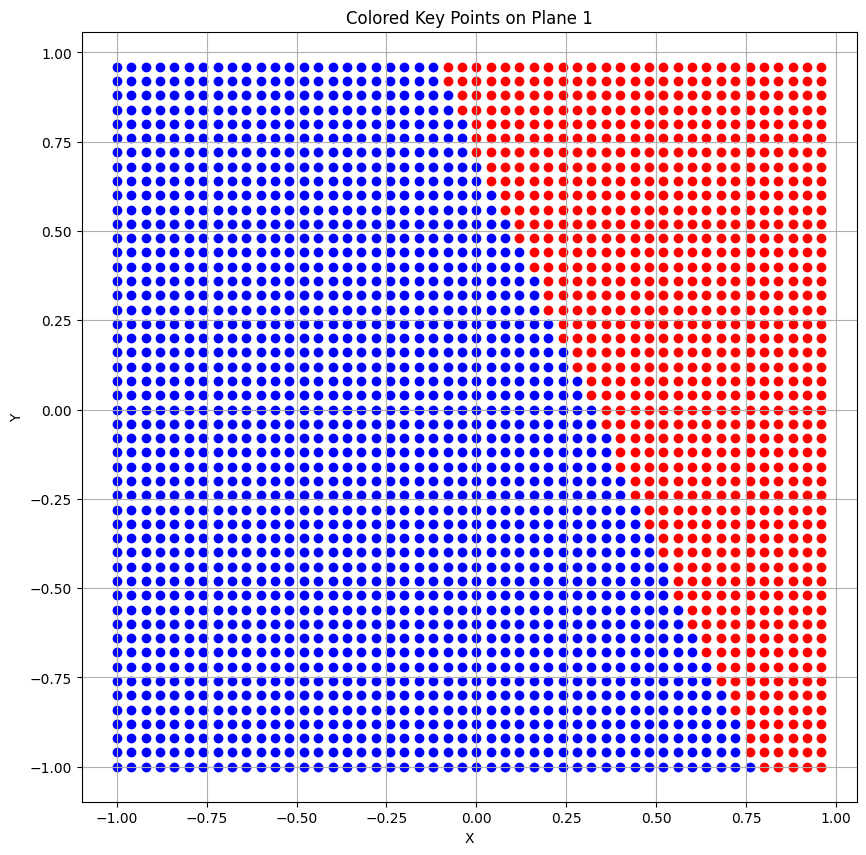

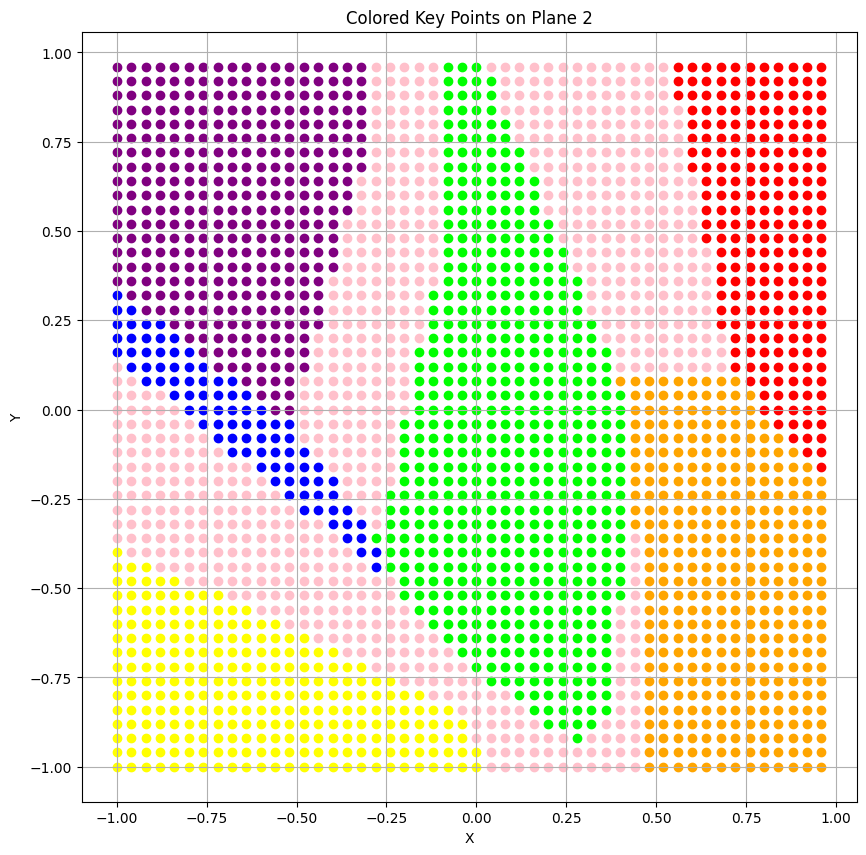

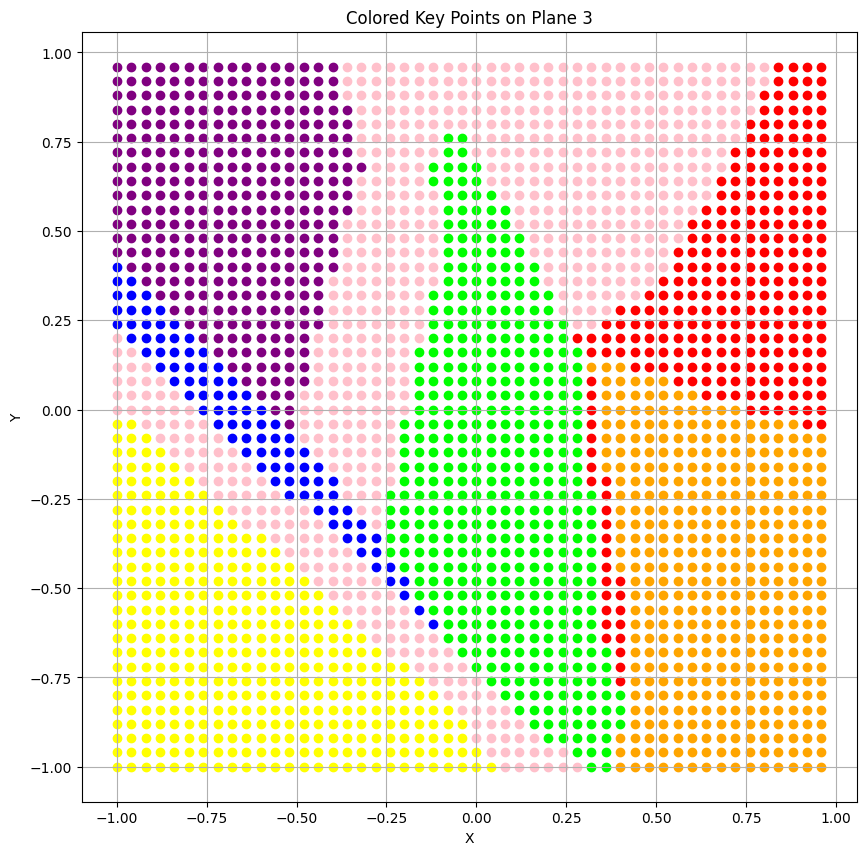

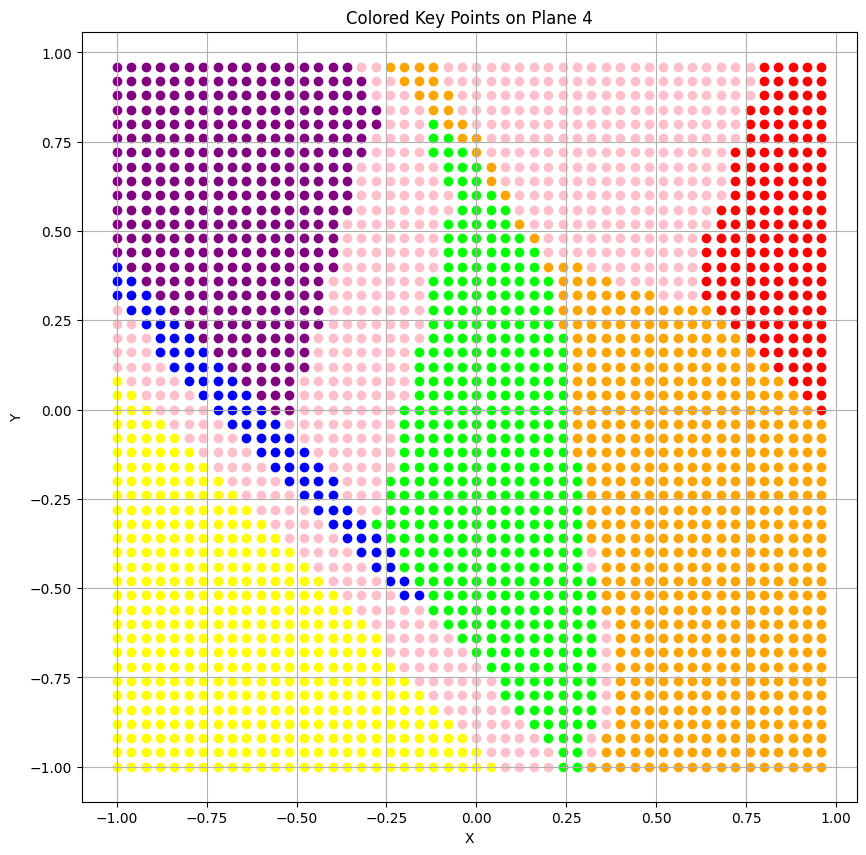

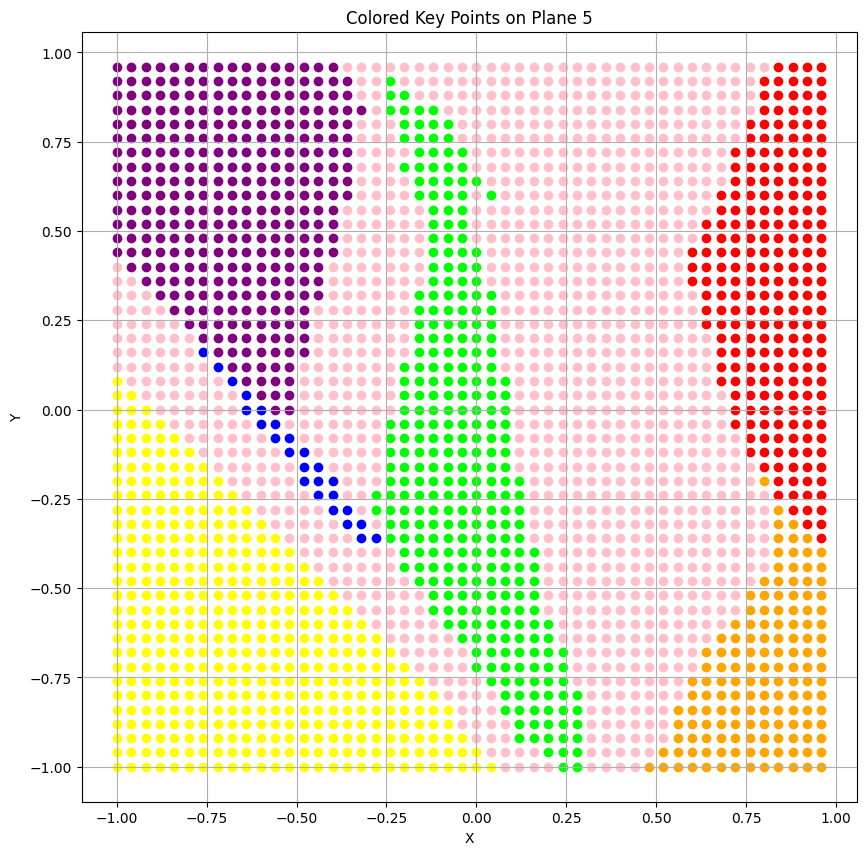

In [119]:
import matplotlib.pyplot as plt

# Цвета для значений
colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
          '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000']

# Количество графиков
N = 5

point = {}
for el in vectors:
    point[el] = model.predict(el)[1]

for i in range(N):
    plt.figure(figsize=(10, 10))  # Создание нового графика

    for key, value in point.items():
        x, y = key.numpy()
        plt.scatter(x, y, color=colors[value[i]], label=f"Value: {value[i]}")

    # Добавляем подписи к осям и заголовок
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Colored Key Points on Plane {i+1}')
    plt.grid(True)
    plt.show()  # Отображаем каждый график отдельно


## Возвращаем режим обучения после предсказания

In [120]:
for layer in model.net:
    if isinstance(layer, MappingLayer):
        print(layer.training_mode)
        layer.training_mode = True # Возвращаем режим обучения после предсказания

True
True
True
True
True


In [ ]:
# Возвращаем режим обучения после предсказания

Обучаем кластеризационные слои

In [121]:
M_history = []
P_history = []
M_delta_history = []
P_delta_history = []
batch_size = 1000
batch_activations = []
id_history = []

# train_data = generate_examples(10000)
# val_data = generate_examples(10000)
# test_data = generate_examples(1000)

with torch.no_grad():
  for i in range(0, len(train_data), batch_size):

    # Сохранение значений M и P
    for layer in model.net:
        if isinstance(layer, MappingLayer):
            M_history.append(layer.M.data.clone().numpy())
            P_history.append(layer.P.data.clone().numpy())
            # id_history.append(layer.ids)

    inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
    inputs_batch = torch.stack(inputs_batch)
    targets_batch = torch.stack(targets_batch)
    outputs = model(inputs_batch)

        # if isinstance(layer, nn.BatchNorm1d):
        #     batch_activations.appemd(layer.data.clone().numpy())

# m_h_0 = [M_history[i] for i in range(0,600,6)]
# m_h_1 = [M_history[i] for i in range(1,600,6)]
# m_h_2 = [M_history[i] for i in range(2,600,6)]
# m_h_3 = [M_history[i] for i in range(3,600,6)]

# m_h_0 = [M_history[i] for i in range(0,400,4)]
# m_h_1 = [M_history[i] for i in range(1,400,4)]
# m_h_2 = [M_history[i] for i in range(2,400,4)]
# m_h_3 = [M_history[i] for i in range(3,400,4)]

In [122]:
point

{tensor([-1., -1.]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.9600]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.9200]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.8800]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.8400]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.8000]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.7600]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.7200]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.6800]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.6400]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.6000]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.5600]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.5200]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.4800]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.4400]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.4000]): [1, 5, 5, 5, 5],
 tensor([-1.0000, -0.3600]): [1, 6, 5, 5, 5],
 tensor([-1.0000, -0.3200]): [1, 6, 5, 5, 5],
 tensor([-1.0000, -0.2800]): [1, 6, 5, 5, 5],
 tensor([-1.0000, -0.2400]): [1, 6, 5, 5, 5],
 tensor([-1.0000, -0.2000]): [1, 6, 5, 5, 5],
 tensor([-1.0000, -0.1600]): [1, 6, 5, 5, 

In [ ]:
# np.array(m_h_1)[:,1,0]

In [ ]:
# M_history[:7]

### Connection и commit to git

In [5]:
# 1. Настройка Git в Colab
!git config --global user.email "@gmail.com"
!git config --global user.name ""

In [6]:
# 2. Генерация SSH ключа
!ssh-keygen -t ed25519 -C "@gmail.com"
!cat /root/.ssh/id_ed25519.pub

Generating public/private ed25519 key pair.
Enter file in which to save the key (/root/.ssh/id_ed25519): ^C
cat: /root/.ssh/id_ed25519.pub: No such file or directory


In [ ]:
# 3. Настройка SSH для GitHub
!touch /root/.ssh/known_hosts
!ssh-keyscan github.com >> /root/.ssh/known_hosts

In [ ]:
# 4. Клонирование репозитория
!git clone git@github.com:kiamrobolab/universal_approximators.git
%cd universal_approximators

In [ ]:
# 5. Создание новой ветки для изменений
!git checkout -b feature/my-new-feature

In [ ]:
# 6. После внесения изменений в файлы, добавление их в индекс
!git add .

In [ ]:
# 7. Создание коммита
!git commit -m "Описание ваших изменений"

In [ ]:
# 8. Отправка изменений в удаленный репозиторий
!git push origin feature/my-new-feature

### После картирования



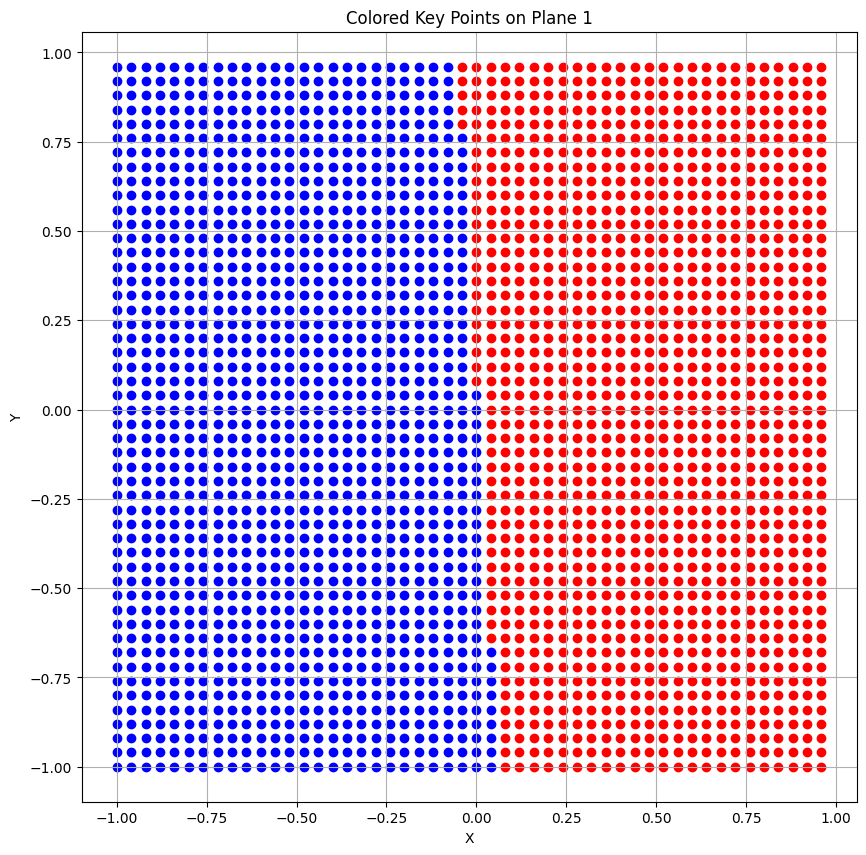

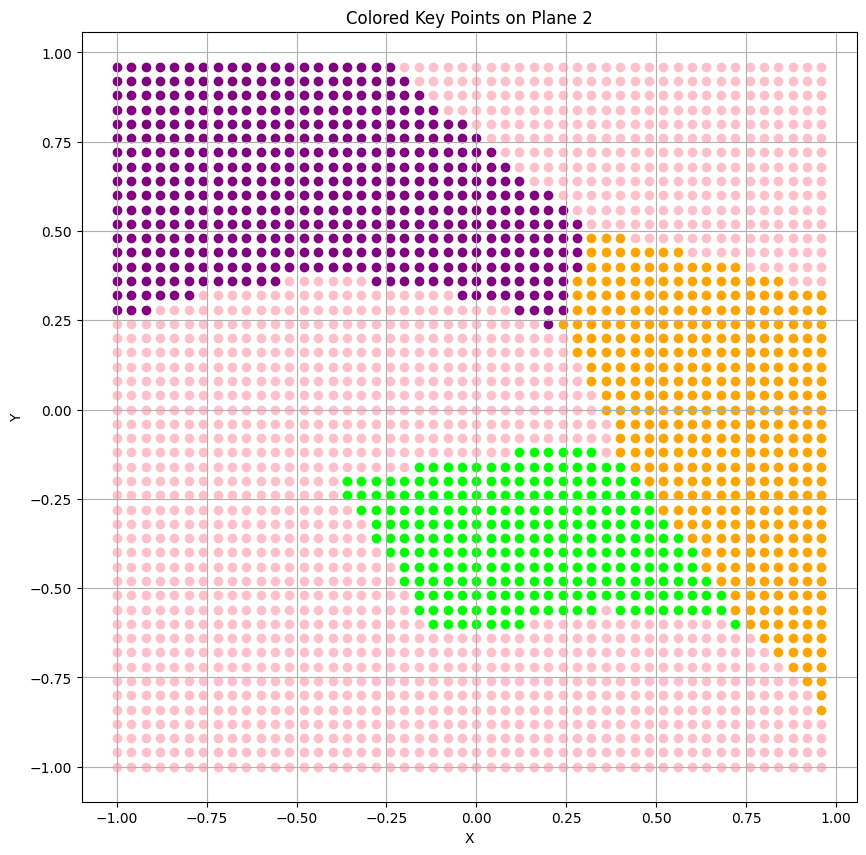

In [114]:
import matplotlib.pyplot as plt

# Цвета для значений
colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
          '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000']

# Количество графиков
N = 2

point = {}
for el in vectors:
    point[el] = model.predict(el)[1]

for i in range(N):
    plt.figure(figsize=(10, 10))  # Создание нового графика

    for key, value in point.items():
        x, y = key.numpy()
        plt.scatter(x, y, color=colors[value[i]], label=f"Value: {value[i]}")

    # Добавляем подписи к осям и заголовок
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Colored Key Points on Plane {i+1}')
    plt.grid(True)
    plt.show()  # Отображаем каждый график отдельно


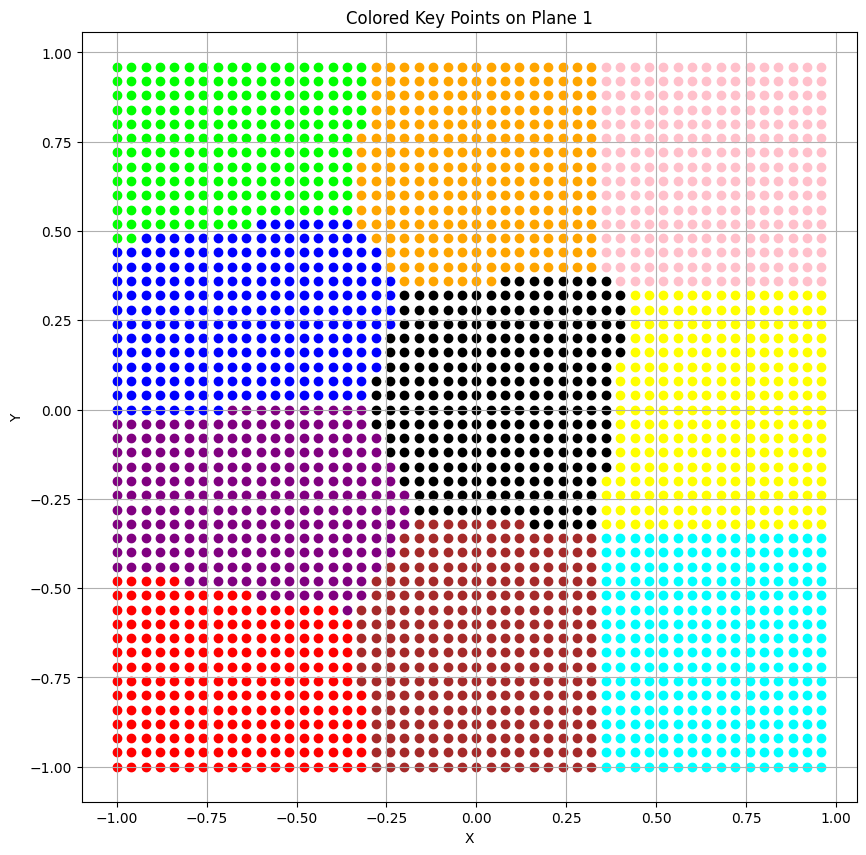

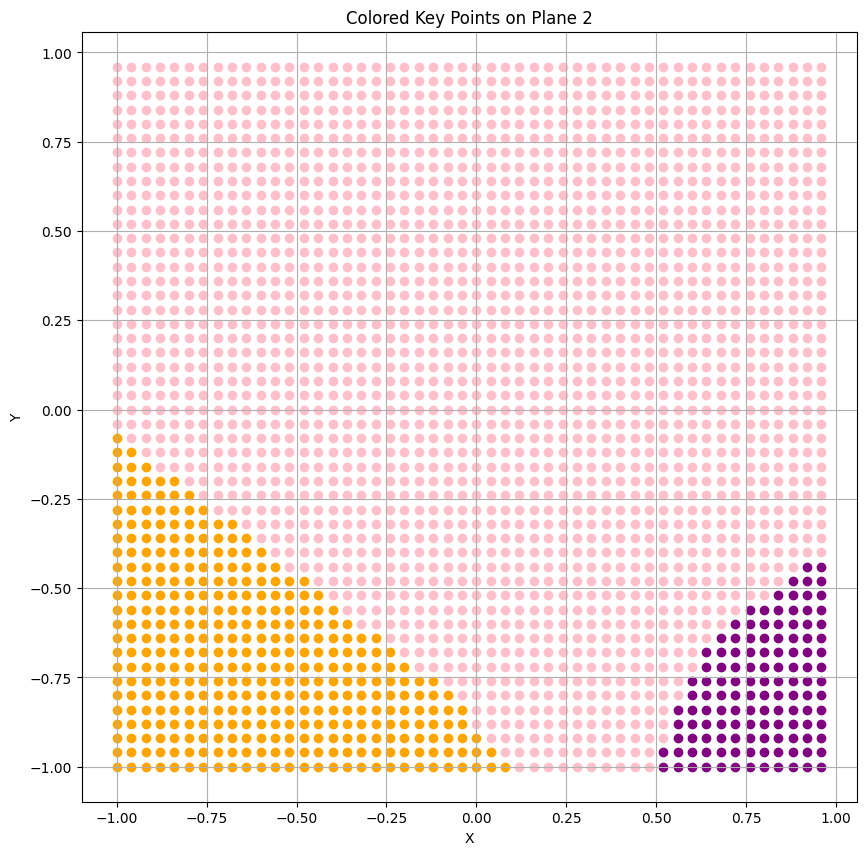

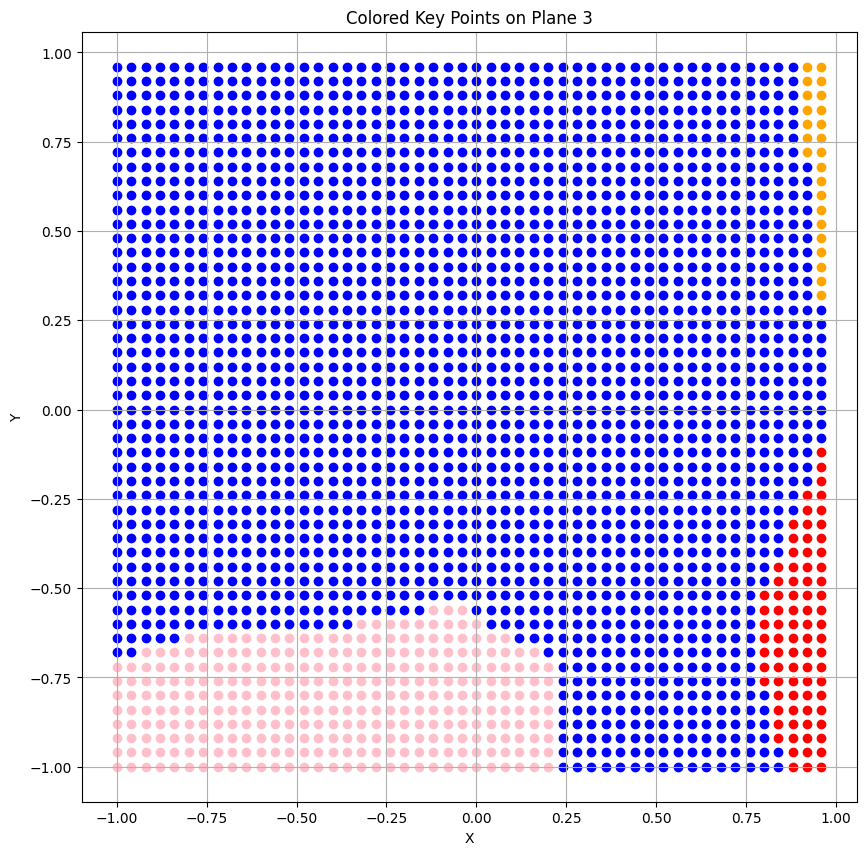

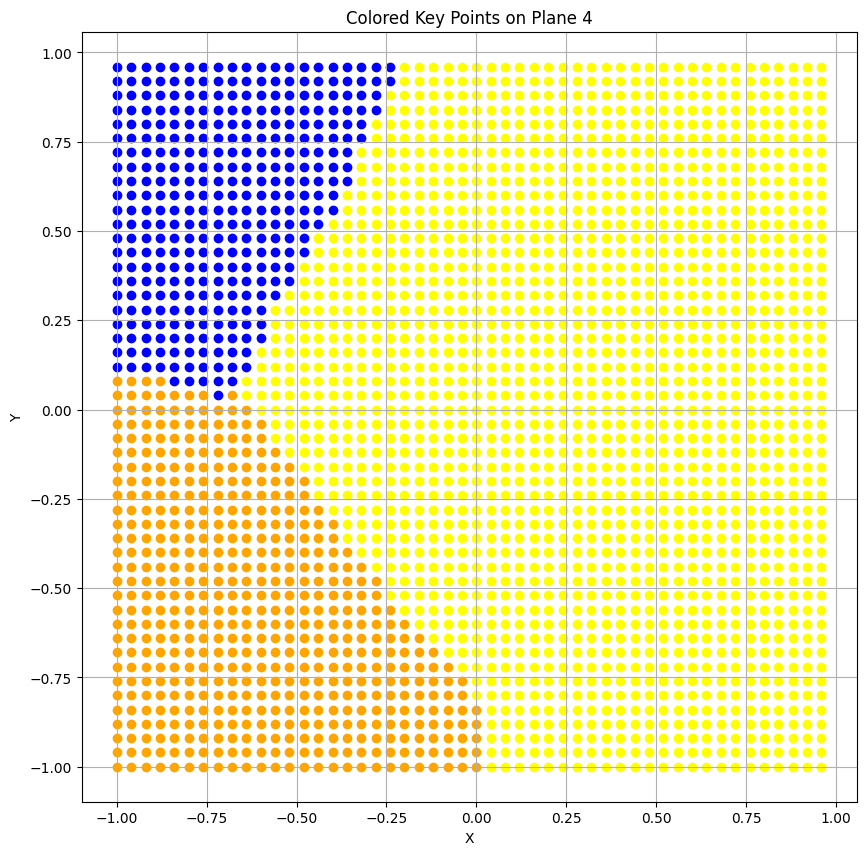

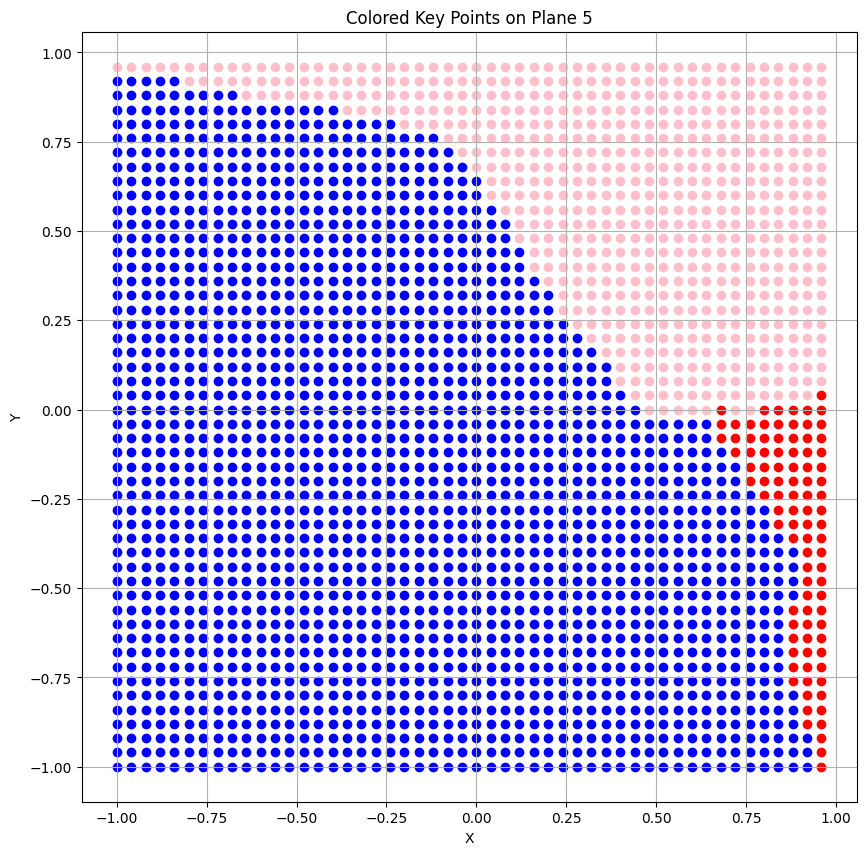

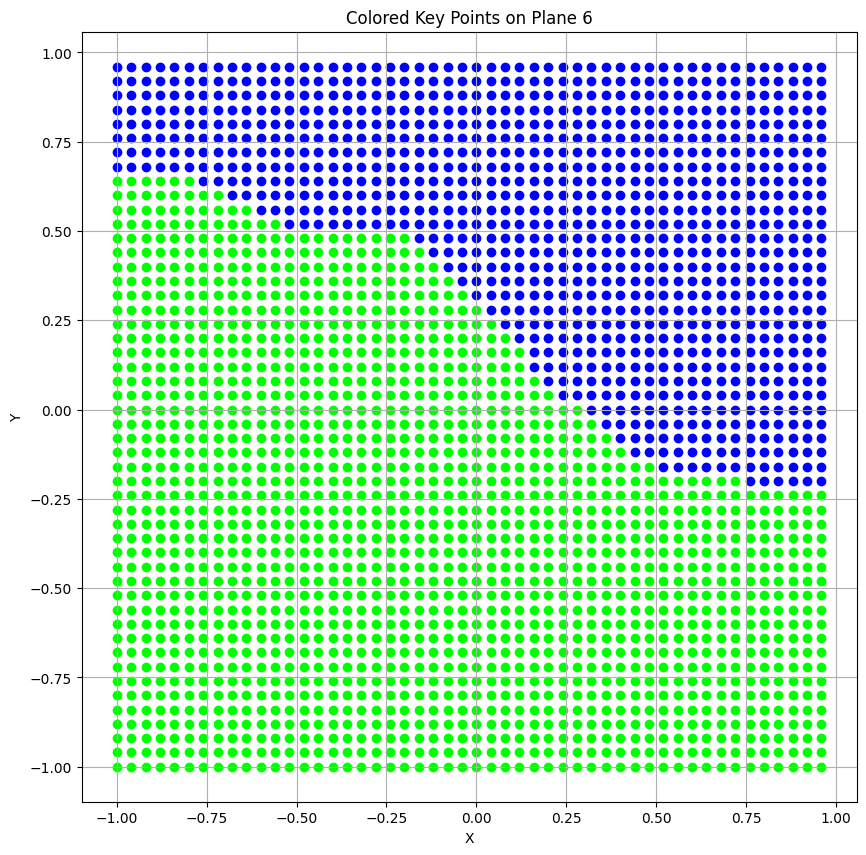

In [ ]:
import matplotlib.pyplot as plt

# Цвета для значений
colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
          '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000']

point = {}
for el in vectors:
    point[el] = model.predict(el)[1]

# Количество графиков
N = 6

point = {}
for el in vectors:
    point[el] = model.predict(el)[1]

for i in range(N):
    plt.figure(figsize=(10, 10))  # Создание нового графика

    for key, value in point.items():
        x, y = key.numpy()
        plt.scatter(x, y, color=colors[value[i]], label=f"Value: {value[i]}")

    # Добавляем подписи к осям и заголовок
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Colored Key Points on Plane {i+1}')
    plt.grid(True)
    plt.show()  # Отображаем каждый график отдельно


In [ ]:
for layer in model.net:
    if isinstance(layer, MappingLayer):
        print(layer.id)

tensor(6)
tensor(6)
tensor(3)
tensor(5)
tensor(6)
tensor(1)


In [ ]:
for layer in model.net:
    if isinstance(layer, MappingLayer):
        print(layer.ids)

{tensor(0.7682): 4, tensor(0.1121): 4}
{tensor([0.0000, 0.0000, 0.0565, 0.0000, 0.4368, 0.6411, 0.1055, 0.8045, 0.7554,
        0.0000]): 4}


### Обучение нейронной сети

In [ ]:
dict_metrics = {}

# Обучение модели
for lays in [3,5,7,9,11]:
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    model = DynamicNet(elements, lays)
    print(f'model with {lays} lays and {elements} elements')
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)
    dict_metrics[f'model_{lays}_{elements}'] = {}
    dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
    dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
    dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
    dict_metrics[f'model_{lays}_{elements}']['model'] = model
    dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
    dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
    print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

In [ ]:
lays = 7
elements = 10
model = DynamicNet(elements, lays)
print(f'model with {lays} lays and {elements} elements')
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)


# dict_metrics[f'model_{lays}_{elements}'] = {}
# dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
# dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
# dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
# dict_metrics[f'model_{lays}_{elements}']['model'] = model.state_dict().copy()
# dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
# dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
# print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

model with 7 lays and 10 elements
predict_forward
1000
x.dim(0) 2 x.size() 1000 x.unsqueeze(0) tensor([[[-0.6016,  0.6098],
         [-0.3899,  0.3392],
         [-0.7618,  0.9105],
         ...,
         [ 0.1089,  0.0239],
         [ 0.5582, -0.1261],
         [-0.3948,  0.2898]]])


RuntimeError: The size of tensor a (1000) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
import pandas as pd

mae_list = []
rmse_list = []
for lays in [3,5,7,9, 11]:
  mae_vector = []
  rmse_vector = []
  for elements in [10, 20, 30, 40, 50, 70, 90]:
    mae_vector += [dict_metrics[el]['metrics'][0] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
    rmse_vector += [dict_metrics[el]['metrics'][1] for el in dict_metrics.keys() if dict_metrics[el]['layers'] == lays and dict_metrics[el]['elements'] == elements]
  mae_list += [mae_vector]
  rmse_list += [rmse_vector]

import seaborn as sns
df = pd.DataFrame(data=rmse_list, index =[3,5,7,9,11], columns=[10, 20, 30, 40, 50, 70, 90])
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

ValueError: 7 columns passed, passed data had 1 columns

## Картирование *v2*

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from typing import Optional, Dict, List, Tuple
from torch import Tensor
import logging
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


class FlexibleBatchNorm(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True):
        """
        Flexible BatchNorm that handles both training and inference modes properly.

        Args:
            num_features: Number of features/channels
            eps: Small constant for numerical stability
            momentum: Momentum factor for running statistics
            affine: Boolean indicating if learnable affine parameters are used
            track_running_stats: Boolean indicating if running statistics should be tracked
        """
        super(FlexibleBatchNorm, self).__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.affine = affine
        self.track_running_stats = track_running_stats

        # Создаем BatchNorm1d для 2D входных данных
        self.batchnorm1d = nn.BatchNorm1d(
            num_features,
            eps=eps,
            momentum=momentum,
            affine=affine,
            track_running_stats=track_running_stats
        )

        # Регистрируем буферы для случая одномерного входа
        if track_running_stats:
            self.register_buffer('running_mean', torch.zeros(num_features))
            self.register_buffer('running_var', torch.ones(num_features))
            self.register_buffer('num_batches_tracked', torch.tensor(0, dtype=torch.long))

        # Создаем параметры для affine преобразования
        if affine:
            self.weight = nn.Parameter(torch.ones(num_features))
            self.bias = nn.Parameter(torch.zeros(num_features))

    def forward(self, x):
        """
        Forward pass supporting both single samples and batches.

        Args:
            x: Input tensor of shape [features] or [batch_size, features]

        Returns:
            Normalized tensor of the same shape as input
        """
        if not torch.is_tensor(x):
            raise TypeError(f'Expected torch.Tensor, got {type(x).__name__}')

        if x.dim() == 1:
            # Для одиночного вектора используем сохраненную статистику
            if self.training:
                # Во время обучения обновляем статистику
                mean = x.mean()
                var = x.var(unbiased=False)

                if self.track_running_stats:
                    self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
                    self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var
                    self.num_batches_tracked += 1
            else:
                # В режиме вывода используем сохраненную статистику
                mean = self.running_mean
                var = self.running_var

            # Нормализация
            x_normalized = (x - mean) / torch.sqrt(var + self.eps)

            # Применяем affine преобразование если необходимо
            if self.affine:
                x_normalized = self.weight * x_normalized + self.bias

            return x_normalized

        elif x.dim() == 2:
            # Для батча используем стандартный BatchNorm1d
            return self.batchnorm1d(x)
        else:
            raise ValueError(f'Unexpected input dimension: {x.dim()}. Expected 1D or 2D tensor.')

    def extra_repr(self) -> str:
        """Дополнительная информация для строкового представления модуля"""
        return (f'num_features={self.num_features}, eps={self.eps}, momentum={self.momentum}, '
                f'affine={self.affine}, track_running_stats={self.track_running_stats}')

class MappingLayer(nn.Module):
    """
    Адаптивный слой отображения, реализующий векторное квантование с обучаемыми центроидами.

    Слой может работать в двух режимах:
    1. Режим обучения: адаптирует центроиды к входным данным
    2. Режим предсказания: находит ближайшие центроиды без их обновления
    """

    def __init__(
        self,
        input_dim: int,
        num_centroids: int,
        beta1: float = 0.01,
        beta2: float = 0.0005,
        beta3: float = 0.01,
        cache_size: int = 1000,
        init_range: float = 1.0,
        orthogonalize: bool = False
    ):
        """
        Args:
            input_dim: Размерность входного вектора
            num_centroids: Количество центроидов
            beta1: Коэффициент обучения для центроидов
            beta2: Коэффициент обучения для смещений
            beta3: Коэффициент для ортогонализации
            cache_size: Размер кэша активаций
            init_range: Диапазон начальной инициализации
            orthogonalize: Применять ли ортогонализацию центроидов
        """
        super(MappingLayer, self).__init__()

        self.input_dim = input_dim
        self.num_centroids = num_centroids
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.cache_size = cache_size
        self.orthogonalize = orthogonalize

        # Инициализация параметров
        self.M = nn.Parameter(
            (torch.rand(num_centroids, input_dim) - 0.5) * 2 * init_range
        )
        self.P = nn.Parameter(torch.zeros(num_centroids))

        # Состояние слоя
        self.training_mode = False
        self.activations_cache = []
        self.distances: Optional[Tensor] = None
        self.current_id: Optional[int] = None
        self.mapping_history: Dict[Tuple[float, ...], int] = {}

        # Метрики
        self.reset_metrics()

        self.logger = logging.getLogger(self.__class__.__name__)

    def reset_metrics(self):
        """Сброс метрик слоя"""
        self.metrics = {
            'total_updates': 0,
            'centroid_usage': torch.zeros(self.num_centroids),
            'mean_distances': torch.zeros(self.num_centroids),
            'last_update': torch.zeros(self.num_centroids)
        }

    def orthogonalize_centroids(self):
        """Применяет ортогонализацию к центроидам"""
        if not self.orthogonalize:
            return

        with torch.no_grad():
            for i in range(self.num_centroids):
                ortho_term = torch.zeros_like(self.M[i])
                for j in range(self.num_centroids):
                    if j != i:
                        similarity = torch.dot(self.M[i], self.M[j])
                        ortho_term += (self.M[i] - self.M[j]) * similarity
                self.M[i] += self.beta3 * ortho_term

    def find_nearest_centroid(self, x: Tensor) -> Tuple[Tensor, Tensor]:
        """
        Находит ближайший центроид для входного вектора или батча.

        Args:
            x: Входной тензор размерности [batch_size, input_dim] или [input_dim]

        Returns:
            Tuple[Tensor, Tensor]: индексы ближайших центроидов и расстояния до них
        """
        if x.dim() == 1:
            x = x.unsqueeze(0)

        # Вычисляем расстояния до всех центроидов
        distances = torch.cdist(x, self.M)
        indices = torch.argmin(distances, dim=1)

        return indices, distances

    def update_centroids(self, x: Tensor, indices: Tensor):
        """
        Обновляет позиции центроидов на основе входных данных.

        Args:
            x: Входной тензор
            indices: Индексы ближайших центроидов
        """
        with torch.no_grad():
            for i, idx in enumerate(indices):
                self.M[idx] += self.beta1 * (x[i] - self.M[idx])
                self.metrics['centroid_usage'][idx] += 1
                self.metrics['total_updates'] += 1

    def cache_activation(self, x: Tensor):
        """Кэширует входную активацию"""
        if len(self.activations_cache) < self.cache_size:
            self.activations_cache.append(x.detach().clone())
        else:
            # Используем FIFO для кэша
            self.activations_cache.pop(0)
            self.activations_cache.append(x.detach().clone())

    def train_forward(self, x: Tensor) -> Tensor:
        """
        Прямой проход в режиме обучения.

        Args:
            x: Входной тензор

        Returns:
            Tensor: Выходной тензор
        """
        indices, distances = self.find_nearest_centroid(x)
        self.update_centroids(x, indices)

        if self.orthogonalize and self.metrics['total_updates'] % 100 == 0:
            self.orthogonalize_centroids()

        # Обновляем историю отображений
        with torch.no_grad():
            for i, vec in enumerate(x):
                self.mapping_history[tuple(vec.detach().cpu().numpy())] = indices[i].item()

        return x

    def predict_forward(self, x: Tensor) -> Tensor:
        """
        Прямой проход в режиме предсказания.

        Args:
            x: Входной тензор

        Returns:
            Tensor: Выходной тензор
        """
        if x.dim() <= 2 and x.size(0) <= 2:
            indices, self.distances = self.find_nearest_centroid(x)
            self.current_id = indices[0]
            self.cache_activation(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        """
        Прямой проход слоя.

        Args:
            x: Входной тензор

        Returns:
            Tensor: Выходной тензор
        """
        if not isinstance(x, torch.Tensor):
            raise TypeError(f"Expected torch.Tensor, got {type(x)}")

        if x.dim() == 0:
            raise ValueError("Input tensor cannot be scalar")

        if x.size(-1) != self.input_dim:
            raise ValueError(
                f"Expected last dimension to be {self.input_dim}, got {x.size(-1)}"
            )

        return self.train_forward(x) if self.training_mode else self.predict_forward(x)

    def reinitialize(self, method: str = 'cached_activations'):
        """
        Переинициализирует центроиды используя различные методы.

        Args:
            method: Метод реинициализации ('cached_activations', 'kmeans', 'random')
        """
        with torch.no_grad():
            if method == 'cached_activations' and len(self.activations_cache) >= self.num_centroids:
                # Используем случайные активации из кэша
                indices = torch.randperm(len(self.activations_cache))[:self.num_centroids]
                self.M.data = torch.stack([self.activations_cache[i] for i in indices])

            elif method == 'kmeans' and len(self.activations_cache) >= self.num_centroids:
                # Используем k-means для инициализации
                from sklearn.cluster import KMeans
                activations = torch.stack(self.activations_cache).numpy()
                kmeans = KMeans(n_clusters=self.num_centroids, n_init=10)
                kmeans.fit(activations)
                self.M.data = torch.from_numpy(kmeans.cluster_centers_).float()

            elif method == 'random':
                # Случайная инициализация
                self.M.data = (torch.rand_like(self.M) - 0.5) * 2

            else:
                self.logger.warning(
                    f"Cannot reinitialize: insufficient cached activations "
                    f"({len(self.activations_cache)}) or invalid method ({method})"
                )

    def get_metrics(self) -> Dict[str, torch.Tensor]:
        """Возвращает текущие метрики слоя"""
        return {
            'centroid_usage': self.metrics['centroid_usage'].clone(),
            'mean_distances': self.metrics['mean_distances'].clone(),
            'total_updates': self.metrics['total_updates']
        }

    def extra_repr(self) -> str:
        """Дополнительная информация для строкового представления"""
        return (f'input_dim={self.input_dim}, num_centroids={self.num_centroids}, '
                f'beta1={self.beta1}, beta2={self.beta2}, beta3={self.beta3}, '
                f'orthogonalize={self.orthogonalize}')

In [ ]:
# # Создание слоя
# mapping = MappingLayer(
#     input_dim=10,
#     num_centroids=5,
#     beta1=0.01,
#     orthogonalize=True
# )

# # Режим обучения
# mapping.training_mode = True
# batch = torch.randn(32, 10)
# output = mapping(batch)

# # Режим предсказания
# mapping.training_mode = False
# single_input = torch.randn(10)
# output = mapping(single_input)

# # Получение метрик
# metrics = mapping.get_metrics()
# print(f"Total updates: {metrics['total_updates']}")
# print(f"Centroid usage: {metrics['centroid_usage']}")

# # Реинициализация с использованием k-means
# mapping.reinitialize(method='kmeans')

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from scipy.spatial import Voronoi
import logging

class NeuralNetworkWithMapping(nn.Module):
    """
    Полносвязная нейронная сеть со встроенным слоем отображения
    """
    def __init__(
        self,
        input_dim: int,
        hidden_dims: List[int],
        output_dim: int,
        num_centroids: int,
        mapping_layer_position: int = 1
    ):
        """
        Args:
            input_dim: Размерность входного слоя
            hidden_dims: Список размерностей скрытых слоев
            output_dim: Размерность выходного слоя
            num_centroids: Количество центроидов в MappingLayer
            mapping_layer_position: Позиция MappingLayer в сети (после какого слоя вставить)
        """
        super(NeuralNetworkWithMapping, self).__init__()

        self.layers = nn.ModuleList()
        self.mapping_layer_position = mapping_layer_position

        # Создаем слои
        current_dim = input_dim
        for i, hidden_dim in enumerate(hidden_dims):
            self.layers.append(nn.Linear(current_dim, hidden_dim))
            self.layers.append(nn.ReLU())

            # Добавляем MappingLayer после указанного слоя
            if i + 1 in mapping_layer_position:
                self.mapping_layer = MappingLayer(
                    input_dim=hidden_dim,
                    num_centroids=num_centroids
                )

            current_dim = hidden_dim

        self.layers.append(nn.Linear(current_dim, output_dim))

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, int]:
        """
        Прямой проход сети

        Returns:
            Tuple[torch.Tensor, int]: (выход сети, индекс ближайшего центроида)
        """
        mapping_id = None

        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i // 2 + 1 == self.mapping_layer_position:
                x = self.mapping_layer(x)
                mapping_id = self.mapping_layer.current_id

        return x, mapping_id

class NetworkVisualizer:
    def __init__(self, model: NeuralNetworkWithMapping, colors: List[str] = None):
        self.model = model
        self.colors = colors or [
            '#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
            '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000'
        ]
        self.logger = logging.getLogger(self.__class__.__name__)

    def plot_voronoi(self, points: Dict[Tuple[float, float], int], layer_idx: int = 0):
        """
        Строит диаграмму Вороного

        Args:
            points: словарь {(x, y): cluster_id}
            layer_idx: индекс слоя
        """
        # Подготовка данных
        points_list = list(points.keys())
        values_list = list(points.values())

        if not points_list:
            self.logger.warning("No points provided for Voronoi diagram")
            return

        points_array = np.array(points_list)

        plt.figure(figsize=(12, 12))

        # Сначала отрисовываем точки
        for (x, y), cluster_id in points.items():
            if cluster_id is not None:  # Проверяем, что cluster_id не None
                plt.scatter(x, y, color=self.colors[cluster_id],
                          s=100, edgecolor='black', zorder=5)

        try:
            # Создаем диаграмму Вороного
            vor = Voronoi(points_array)

            # Получаем границы точек для ограничения области построения
            x_min, y_min = points_array.min(axis=0)
            x_max, y_max = points_array.max(axis=0)

            # Добавляем отступ
            margin = 0.1
            dx = x_max - x_min
            dy = y_max - y_min
            x_min -= margin * dx
            x_max += margin * dx
            y_min -= margin * dy
            y_max += margin * dy

            # Отрисовка границ регионов Вороного
            for region in vor.regions:
                if len(region) > 0 and -1 not in region:  # Проверяем валидность региона
                    polygon = [vor.vertices[i] for i in region]
                    if polygon:
                        plt.fill(*zip(*polygon), alpha=0.2,
                                color='gray', zorder=1)
                        plt.plot(*zip(*polygon + [polygon[0]]),
                                'k-', lw=1, zorder=2)

        except Exception as e:
            self.logger.error(f"Error creating Voronoi diagram: {e}")
            # Если не удалось создать диаграмму Вороного,
            # хотя бы отобразим точки (они уже отрисованы выше)

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title(f'Points Distribution - Layer {layer_idx + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

    def plot_scatter(self, points: Dict[Tuple[float, float], int], n_plots: int = 6):
        """Строит scatter-plot"""
        plt.figure(figsize=(10, 10))

        for (x, y), cluster_id in points.items():
            if cluster_id is not None:  # Проверяем, что cluster_id не None
                plt.scatter(x, y, color=self.colors[cluster_id],
                          s=100, edgecolor='black')

        plt.title('Cluster Distribution')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

    def analyze_and_visualize(self, vectors: torch.Tensor, mode: str = 'both'):
        """
        Анализирует и визуализирует результаты работы сети

        Args:
            vectors: Входные векторы
            mode: Режим визуализации ('voronoi', 'scatter', 'both')
        """
        self.model.eval()
        points = {}

        with torch.no_grad():
            for vec in vectors:
                output, mapping_id = self.model(vec)
                key = tuple(vec.numpy())
                points[key] = mapping_id.item() if mapping_id is not None else None

        if mode in ['voronoi', 'both']:
            # Фильтруем точки с None значениями для диаграммы Вороного
            valid_points = {k: v for k, v in points.items() if v is not None}
            if valid_points:
                self.plot_voronoi(valid_points)
            else:
                self.logger.warning("No valid points for Voronoi diagram")

        if mode in ['scatter', 'both']:
            self.plot_scatter(points)

        # Вывод статистики
        centroid_usage = {}
        for value in points.values():
            if value is not None:
                centroid_usage[value] = centroid_usage.get(value, 0) + 1

        print("\nCentroid Usage Statistics:")
        for centroid, count in centroid_usage.items():
            print(f"Centroid {centroid}: {count} points")

# Генерация данных
def generate_examples(num_samples):
    X = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    Y = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    return [(torch.tensor(X[i], dtype=torch.float32), torch.tensor([X[i][0]*X[i][1]*X[i][1], X[i][0]*X[i][0]*X[i][1]], dtype=torch.float32)) for i in range(num_samples)]

def generate_sample_data(n_points: int = 1000) -> torch.Tensor:

    return [np.random.uniform(-1, 1, (2)) for _ in range(n_points)]

def main():
    # Создаем модель
    model = NeuralNetworkWithMapping(
        input_dim=2,
        hidden_dims=[64, 32, 16],
        output_dim=10,
        num_centroids=5,
        mapping_layer_position=2
    )

    # Генерируем тестовые данные
    vectors = generate_sample_data()

    # Создаем визуализатор
    visualizer = NetworkVisualizer(model)

    # Анализируем и визуализируем
    visualizer.analyze_and_visualize(vectors, mode='scatter')

# if __name__ == "__main__":
#     main()

In [ ]:
train_data = generate_examples(100000)
val_data = generate_examples(10000)
test_data = generate_examples(1000)

In [ ]:

# Создаем модель
model = NeuralNetworkWithMapping(
    input_dim=2,
    hidden_dims=[64, 32, 16],
    output_dim=10,
    num_centroids=5,
    mapping_layer_position=2
)

# Генерируем тестовые данные
vectors = generate_sample_data()

# Создаем визуализатор
visualizer = NetworkVisualizer(model)

# Анализируем и визуализируем
# visualizer.analyze_and_visualize(vectors, mode='scatter')

model.eval()
points = {}


with torch.no_grad():
    for vec in vectors:
        output, mapping_id = model(vec)
        points[tuple(vec.numpy())] = mapping_id

In [ ]:
output, mapping_id = model(vec)
mapping_id

In [ ]:
colors = [
            '#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
            '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000'
        ]

for i in range(15):
  color=colors[values[i % 15]]

NameError: name 'values' is not defined

### Черновик

In [ ]:
# model = DynamicNet(10, 3)
M_history = []
P_history = []
M_delta_history = []
P_delta_history = []
batch_size = 100
batch_activations = []
id_history = []

# train_data = generate_examples(10000)
# val_data = generate_examples(10000)
# test_data = generate_examples(1000)

with torch.no_grad():
  for i in range(0, len(train_data), batch_size):
    # Сохранение значений M и P
    for layer in model.net:
        if isinstance(layer, MappingLayer):
            M_history.append(layer.M.data.clone().numpy())
            P_history.append(layer.P.data.clone().numpy())
            # id_history.append(layer.ids)

    inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
    inputs_batch = torch.stack(inputs_batch)
    targets_batch = torch.stack(targets_batch)
    outputs = model(inputs_batch)

        # if isinstance(layer, nn.BatchNorm1d):
        #     batch_activations.appemd(layer.data.clone().numpy())

m_h_0 = [M_history[i] for i in range(0,400,4)]
m_h_1 = [M_history[i] for i in range(1,400,4)]
m_h_2 = [M_history[i] for i in range(2,400,4)]
m_h_3 = [M_history[i] for i in range(3,400,4)]

In [ ]:
id_history = []

for layer in model.net:
  if isinstance(layer, MappingLayer):
    id_history.append(layer.ids)

In [ ]:
# # Цвета для значений
# colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
#           '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000']

# # Создаем график
# plt.figure(figsize=(10, 10))

# for key, value in list(id_history[1].items())[:5000]:
#     x, y = key.numpy()
#     plt.scatter(x, y, color=colors[value], label=f"Value: {value}")

# # Добавляем подписи к осям и заголовок
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Colored Key Points on Plane')
# plt.grid(True)

In [ ]:
# # Цвета для значений
# colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080',
#           '#FFFF00', '#FFC0CB', '#A52A2A', '#00FFFF', '#000000']

# # Создаем график
# plt.figure(figsize=(10, 10))

# for key, value in list(id_history[0].items())[:5000]:
#     x, y = key.numpy()
#     plt.scatter(x, y, color=colors[value], label=f"Value: {value}")

# # Добавляем подписи к осям и заголовок
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Colored Key Points on Plane')
# plt.grid(True)

In [ ]:
# id_h_0 = [id_history[i] for i in range(0,400,4)]
m_h_0 = [M_history[i] for i in range(0,400,4)]
m_h_1 = [M_history[i] for i in range(1,400,4)]
m_h_2 = [M_history[i] for i in range(2,400,4)]
m_h_3 = [M_history[i] for i in range(3,400,4)]

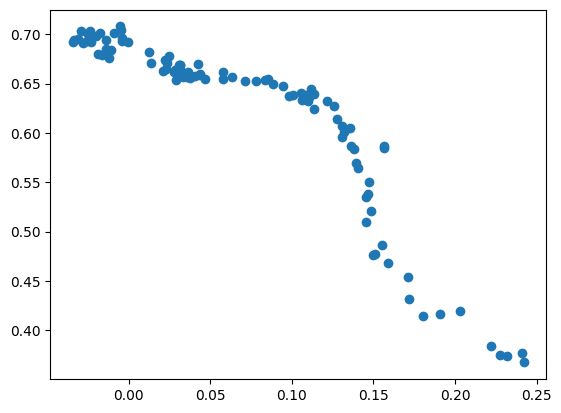

In [ ]:
plt.scatter(np.array(m_h_0)[:,4,0],np.array(m_h_0)[:,4,1])

In [ ]:
train_data_np = np.array(train_data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points_with_id(x, id_h_0):
  """
  Отображает массив точек x и раскрашивает каждую точку в соответствии со значением id_h_0.

  Args:
    x: Массив точек формы (N, 2), где N - количество точек.
    id_h_0: Массив целых чисел формы (N,), содержащий идентификаторы для каждой точки.
  """

  # Создаем цветовую палитру
  colors = plt.cm.get_cmap('viridis', np.max(id_h_0) + 1)

  # Отображаем точки
  plt.figure(figsize=(8, 6))
  plt.scatter(x[:500,0,0], x[:500,0,1], c=id_h_0, cmap=colors)
  plt.colorbar(label='id_h_0')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Точки, раскрашенные по id_h_0')
  plt.show()


plot_points_with_id(train_data_np, id_h_0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

In [ ]:
# id_h_0

In [ ]:
np.array(id_h_0).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

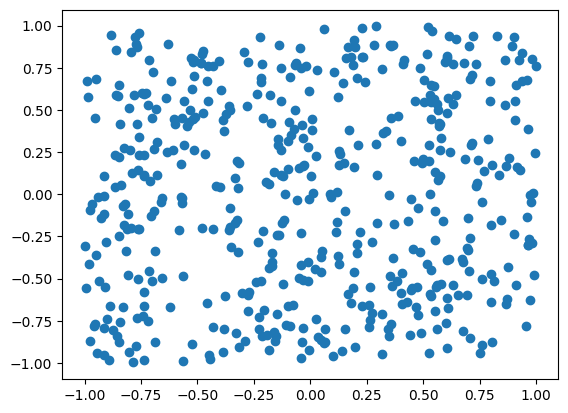

In [ ]:
plt.scatter(train_data_np[:500,0,0],train_data_np[:500,0,1]) id_h_0

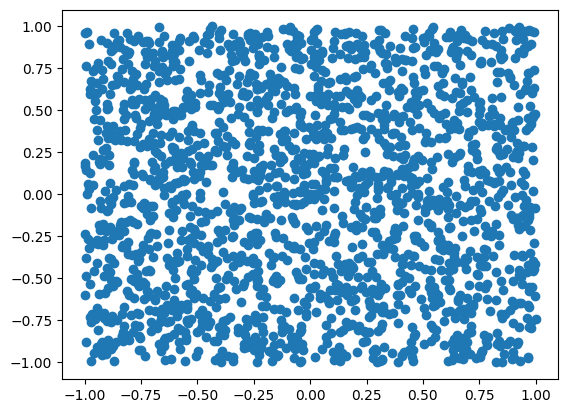

In [ ]:
plt.scatter(train_data[:2000,0,0],train_data[:2000,0,1])

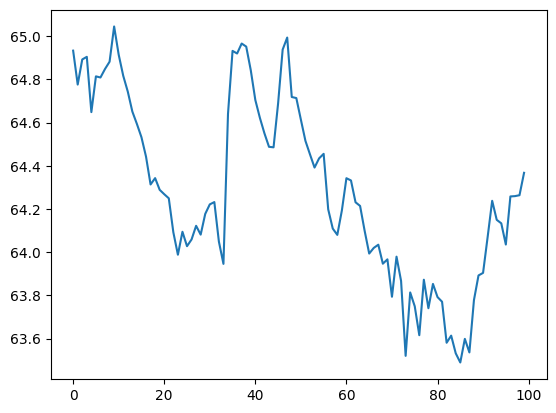

In [ ]:
scales_0 = [(np.abs(np.dot(m_h_0[i],m_h_0[i].T))/np.outer(np.linalg.norm(m_h_0[i], axis=1), np.linalg.norm(m_h_0[i], axis=1)) ).sum() for i in range(100)]
plt.plot(scales_0)

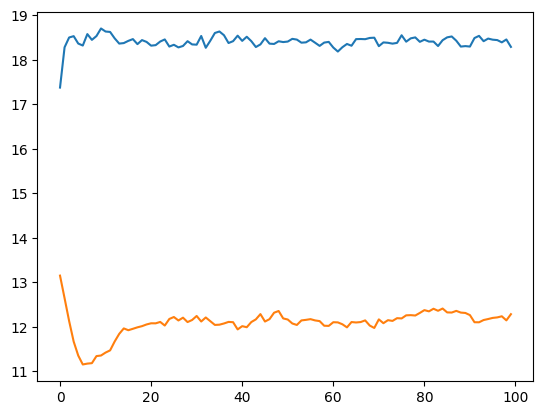

In [ ]:
# scales = [(np.abs(np.dot(m_h_1[i],m_h_1[i].T))/(np.linalg.norm(m_h_1[i], axis=1) * np.linalg.norm(m_h_1[i], axis=1)) ).sum() for i in range(100)]
scales_1 = [(np.abs(np.dot(m_h_1[i],m_h_1[i].T))/np.outer(np.linalg.norm(m_h_1[i], axis=1), np.linalg.norm(m_h_1[i], axis=1)) ).sum() for i in range(100)]
scales_2 = [(np.abs(np.dot(m_h_1[i],m_h_2[i].T))/np.outer(np.linalg.norm(m_h_1[i], axis=1), np.linalg.norm(m_h_2[i], axis=1)) ).sum() for i in range(100)]
plt.plot(scales_1)
plt.plot(scales_2)

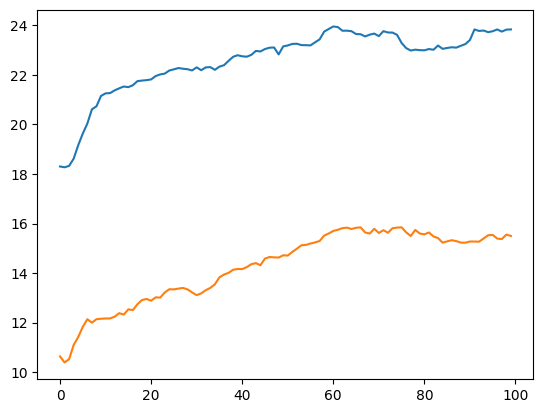

In [ ]:
scales_4 = [(np.abs(np.dot(m_h_2[i],m_h_2[i].T))/ np.outer(np.linalg.norm(m_h_2[i], axis=1), np.linalg.norm(m_h_2[i], axis=1)) ).sum() for i in range(100)]
scales_5 = [(np.abs(np.dot(m_h_2[i],m_h_3[i].T))/ np.outer(np.linalg.norm(m_h_2[i], axis=1), np.linalg.norm(m_h_3[i], axis=1)) ).sum() for i in range(100)]
plt.plot(scales_4)
plt.plot(scales_5)

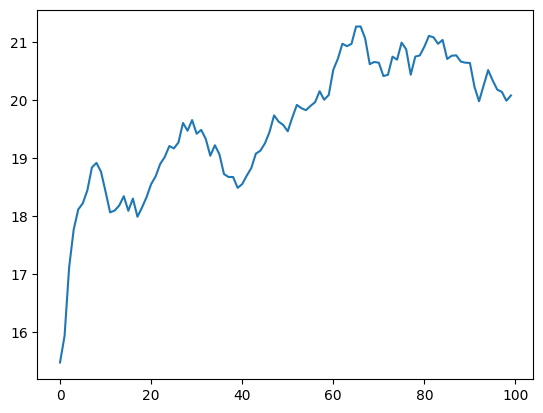

In [ ]:
scales_6 = [(np.abs(np.dot(m_h_3[i],m_h_3[i].T))/ np.outer(np.linalg.norm(m_h_3[i], axis=1), np.linalg.norm(m_h_3[i], axis=1)) ).sum() for i in range(100)]
plt.plot(scales_6)

In [ ]:
train_data = np.array(train_data)

In [ ]:
all_points = np.vstack([points, fictitious_points])
vor = Voronoi(all_points)

(10000, 2)

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, ConvexHull
import itertools

vor = Voronoi(m_h_1[0].T)

In [ ]:
vor.vertices

array([[ 6.19653707e-01,  1.77717720e+00, -3.18654253e-01,
         4.80025959e-01,  5.10004197e-01,  1.78582191e-01,
        -2.56452385e-01],
       [ 4.37419216e-01,  7.86977691e-01, -1.04422636e-01,
         3.46659645e-02, -6.75751197e-02,  8.13940895e-01,
        -2.39631524e-01],
       [ 4.51413866e-01,  8.07207052e-01, -2.18370670e-01,
         1.96254268e-01, -1.79421721e-01,  7.91193900e-01,
        -3.40056867e-01],
       [ 2.24250701e-01, -5.94369237e-01,  1.11404421e-01,
         4.27789624e-01, -1.85293581e-01,  9.27178009e-01,
         2.27296064e-01],
       [ 6.74335319e-01,  2.09731496e+00,  5.98894644e-02,
        -8.48042542e-02,  2.75835278e-01,  5.24440124e-01,
        -1.18699980e+00],
       [ 9.92827657e-01,  3.73755613e+00,  1.84738559e-02,
         1.12332862e-01,  4.57202036e-01,  1.23279794e-01,
        -2.55489208e+00],
       [ 1.67687126e+00,  6.29019419e+00,  3.18492688e+00,
         1.31797687e+00,  3.00691789e+00, -1.68438267e+00,
        -7.7713456

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, ConvexHull
import itertools

points = m_h_1[0].T

# Границы объема
bounds = np.array([[-1, 1], [-1, 1], [-1, 1],[-1, 1], [-1, 1], [-1, 1],[-1,1]])

# Добавление фиктивных точек на границах объема
fictitious_points = []
for comb in itertools.product([-1, 1], repeat=7):
    fictitious_points.append(comb)
fictitious_points = np.array(fictitious_points)

# Построение диаграммы Вороного для исходных и фиктивных точек
all_points = np.vstack([points, fictitious_points])
vor = Voronoi(all_points)

# Функция для подсчета объемов многомерных областей Вороного
def voronoi_volume(vor, region, bounds):
    vertices = vor.vertices[region]
    if -1 in region:  # Игнорируем бесконечные регионы
        return 0

    # Обрезка вершин по границам bounds
    for dim in range(vertices.shape[1]):
        vertices[:, dim] = np.clip(vertices[:, dim], bounds[dim, 0], bounds[dim, 1])

    try:
        hull = ConvexHull(vertices)
        return hull.volume
    except:
        return 0

# Подсчет объемов областей для исходных точек
volumes = []
for region_index in vor.point_region[:len(points)]:
    region = vor.regions[region_index]
    if not -1 in region and len(region) > 0:  # Игнорируем бесконечные и пустые регионы
        volume = voronoi_volume(vor, region, bounds)
        volumes.append(volume)

print("Volumes of bounded Voronoi regions:", volumes)


Volumes of bounded Voronoi regions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import numpy as np
from scipy.spatial import Voronoi, ConvexHull

# Построение диаграммы Вороного
vor = Voronoi(m_h_1[0].T)

# Определение границ
min_bound = np.array([-1, -1, -1, -1, -1, -1, -1])
max_bound = np.array([1, 1, 1, 1, 1, 1, 1])

# Функция для пересечения бесконечных областей с заданными границами и подсчета объемов областей Вороного
def voronoi_volume(vor, region, min_bound, max_bound):
    vertices = vor.vertices[region]
    if -1 in region:  # Игнорируем бесконечные регионы
        inf_idx = region.index(-1)
        # print(vor.vertices[region[1:]])
        finite_part = vor.vertices[region[1:]]
        centroid = np.mean(finite_part, axis=0)
        direction = finite_part - centroid
        extended_vertices = []
        for d in direction:
            for bound in [min_bound, max_bound]:
                t = (bound - centroid) / d
                intersections = centroid + t * d
                if np.all(intersections >= min_bound) and np.all(intersections <= max_bound):
                    extended_vertices.append(intersections)
        vertices = np.vstack((extended_vertices, finite_part))
        # print(extended_vertices)
    if len(vertices) < 3:
        return 0
    try:
        hull = ConvexHull(vertices)
        return hull.volume
    except:
        return -1

# Подсчет объемов областей
volumes = [voronoi_volume(vor, region, min_bound, max_bound) for region in vor.regions if len(region) > 0]

print("Volumes of Voronoi regions:", volumes)


Volumes of Voronoi regions: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [ ]:
vor.regions[0][1:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
M_flat = np.array(m_h_0)

In [ ]:
# Построение диаграммы Вороного
vor = Voronoi(m_h_1[99].T)
# vor.vertices[vor.regions[1]]

NameError: name 'Voronoi' is not defined

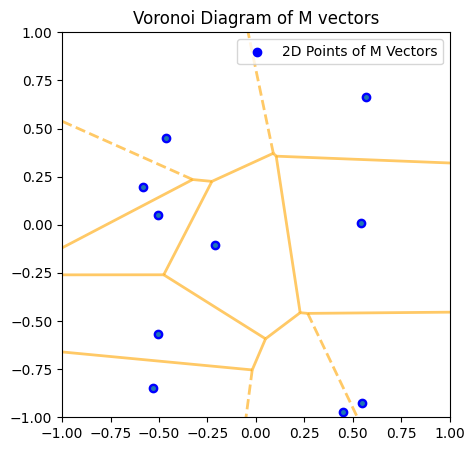

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
del plt
import matplotlib.pyplot as plt

M_flat = m_h_0[0]

# Построение диаграммы Вороного
vor = Voronoi(M_flat)

fig, ax = plt.subplots(figsize=(5, 5))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=5)

# Отображение точек
ax.scatter(M_flat[:, 0], M_flat[:, 1], color='blue', label='2D Points of M Vectors')

# Настройка отображения
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_title('Voronoi Diagram of M vectors')
ax.legend()
plt.show()

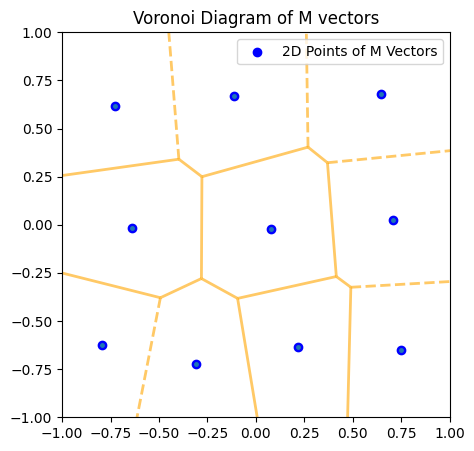

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
del plt
import matplotlib.pyplot as plt

M_flat = m_h_0[99]

# Построение диаграммы Вороного
vor = Voronoi(M_flat)

fig, ax = plt.subplots(figsize=(5, 5))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=5)

# Отображение точек
ax.scatter(M_flat[:, 0], M_flat[:, 1], color='blue', label='2D Points of M Vectors')

# Настройка отображения
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_title('Voronoi Diagram of M vectors')
ax.legend()
plt.show()

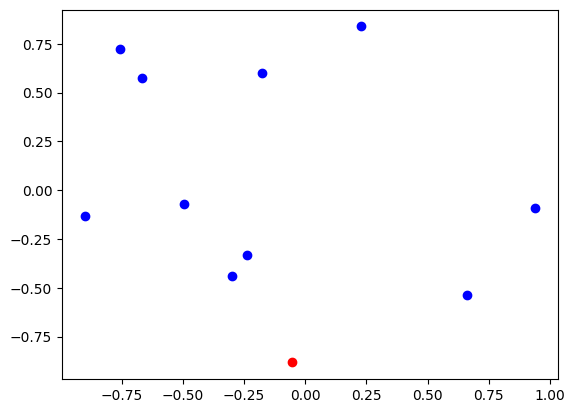

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[0][0][0],train_data[0][0][1], color='red', label='Matrix Points')

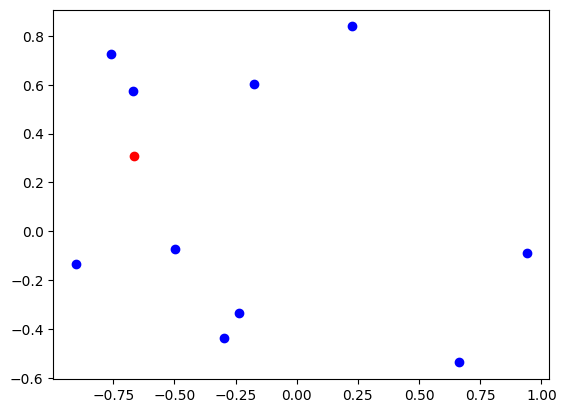

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[1][0][0],train_data[1][0][1], color='red', label='Matrix Points')

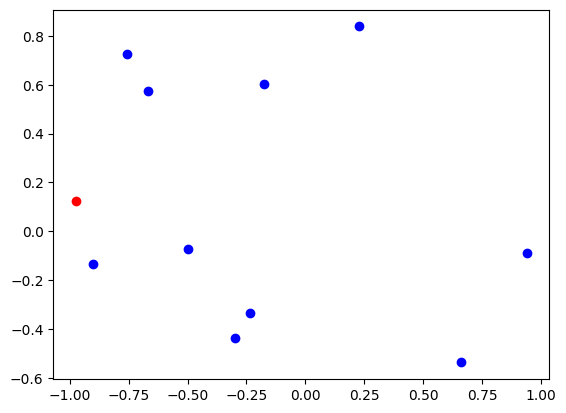

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[2][0][0],train_data[2][0][1], color='red', label='Matrix Points')

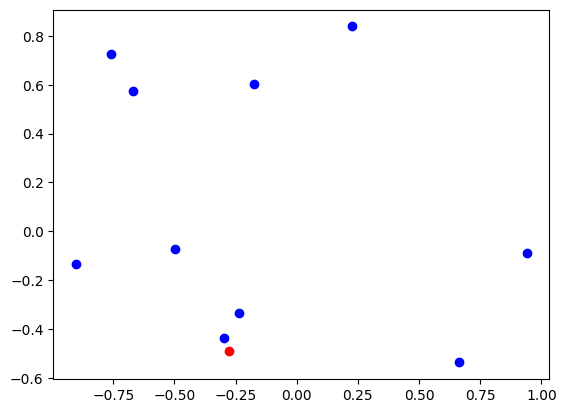

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[3][0][0],train_data[3][0][1], color='red', label='Matrix Points')

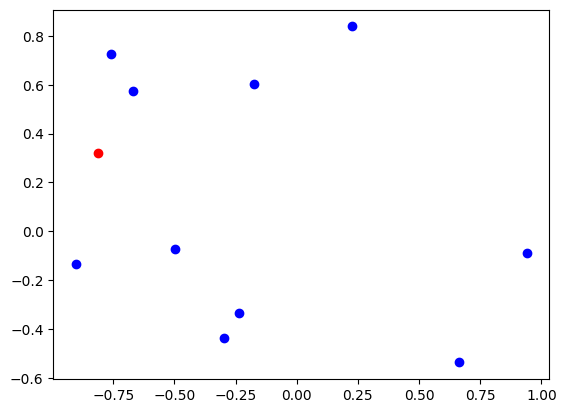

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[4][0][0],train_data[4][0][1], color='red', label='Matrix Points')

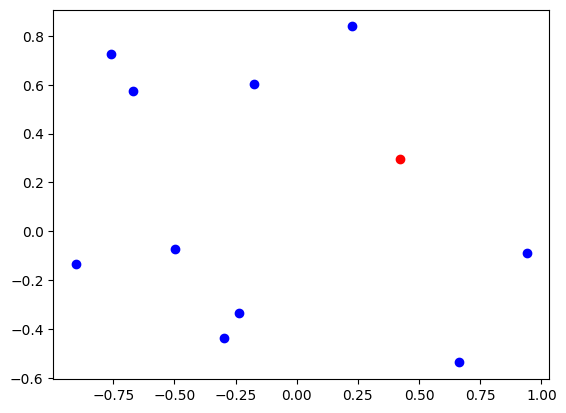

In [ ]:
plt.scatter(M_history[0][:,0], M_history[0][:,1], color='blue', label='Matrix Points')
plt.scatter(train_data[5][0][0],train_data[5][0][1], color='red', label='Matrix Points')

In [ ]:
import pandas as pd
df = None
del df
df = None

for t, M in enumerate(m_h_0):
    # Разделение матрицы на x и y координаты
    x_coords = M[:, 0]
    y_coords = M[:, 1]
    z_coords = np.full_like(x_coords, t)  # Временной шаг как координата z

    # Создание DataFrame из текущих координат
    new_df = pd.DataFrame({'Input_x1': x_coords, 'Input_x2': y_coords, 'Time': z_coords})

    # Объединение с основным DataFrame
    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, x='Input_x1', y='Input_x2', z='Time', title='Input Values')
fig.show()

In [ ]:
import pandas as pd
df = None

for t, M in enumerate(m_h_0):
    # Разделение матрицы на x и y координаты
    x_coords = M[:, 0]
    y_coords = M[:, 1]
    z_coords = np.full_like(x_coords, t)  # Временной шаг как координата z

    # Создание DataFrame из текущих координат
    new_df = pd.DataFrame({'Input_x1': x_coords, 'Input_x2': y_coords, 'Time': z_coords})

    # Объединение с основным DataFrame
    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, x='Input_x1', y='Input_x2', z='Time', title='Input Values')
fig.show()

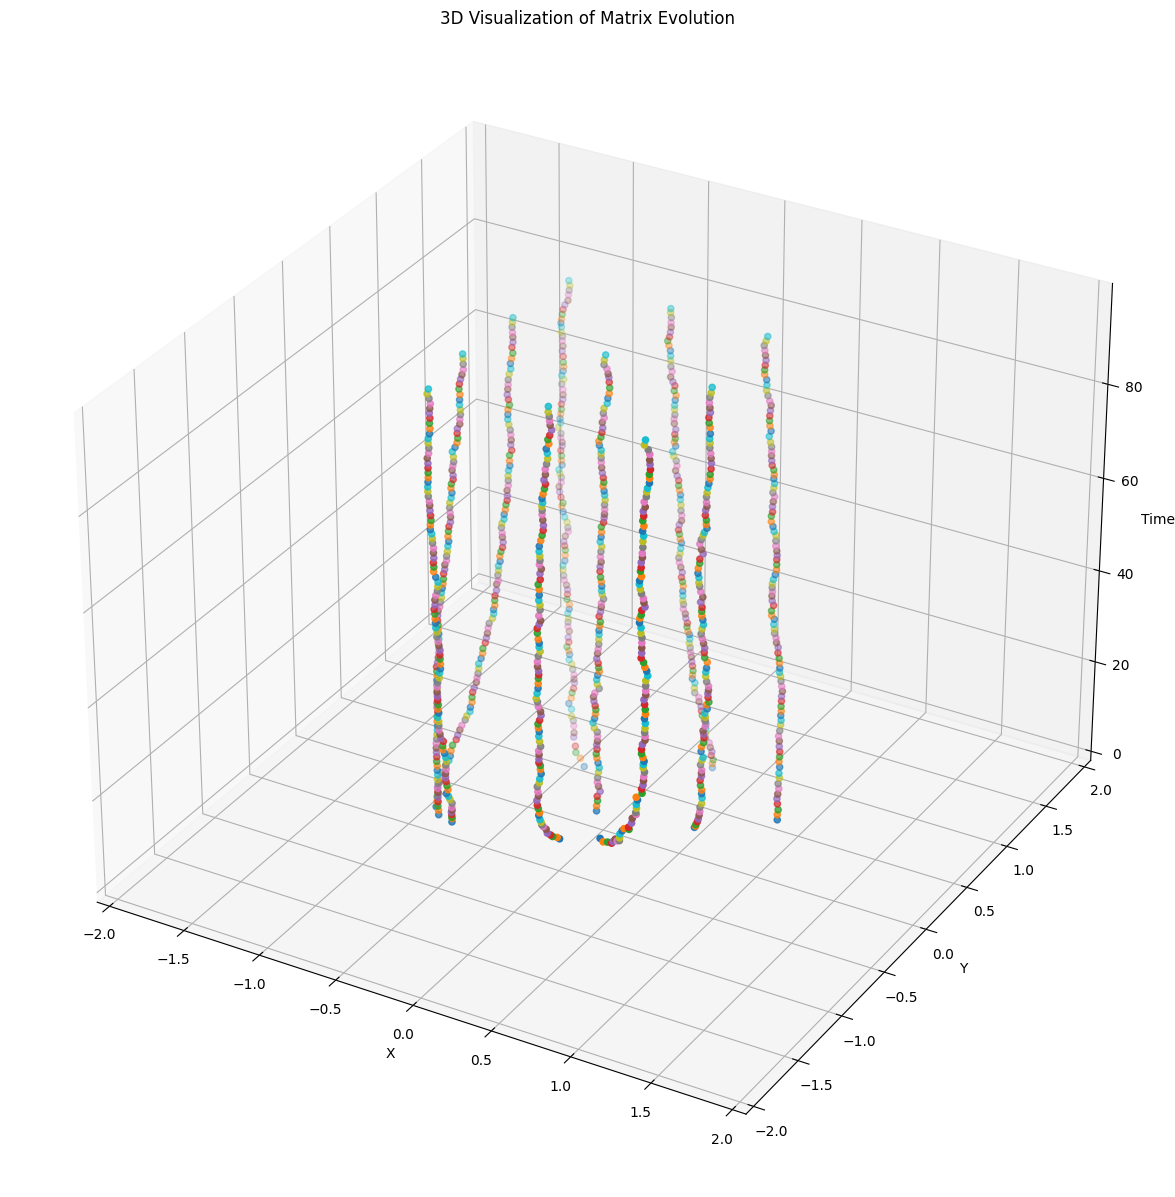

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_matrix_evolution(M_history):
    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(111, projection='3d')

    # Обход каждого временного шага
    for t, M in enumerate(M_history):
        # Разделение матрицы на x и y координаты
        x_coords = M[ :, 0]
        y_coords = M[:, 1]
        z_coords = np.full_like(x_coords, t)  # Временной шаг как координата z

        ax.scatter(x_coords, y_coords, z_coords, label=f'Time {t}', )

    ax.set_title('3D Visualization of Matrix Evolution')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Time')


    # Установка ограничений на оси
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, len(M_history) - 1)

    # plt.legend()
    plt.show()

# Вызов функции для отображения 3D графика
plot_3d_matrix_evolution(M_history)


In [ ]:
# M_history

In [ ]:
# plt.scatter(M_history[0][0], M_history[0][1], color='blue', label='Matrix Points')

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


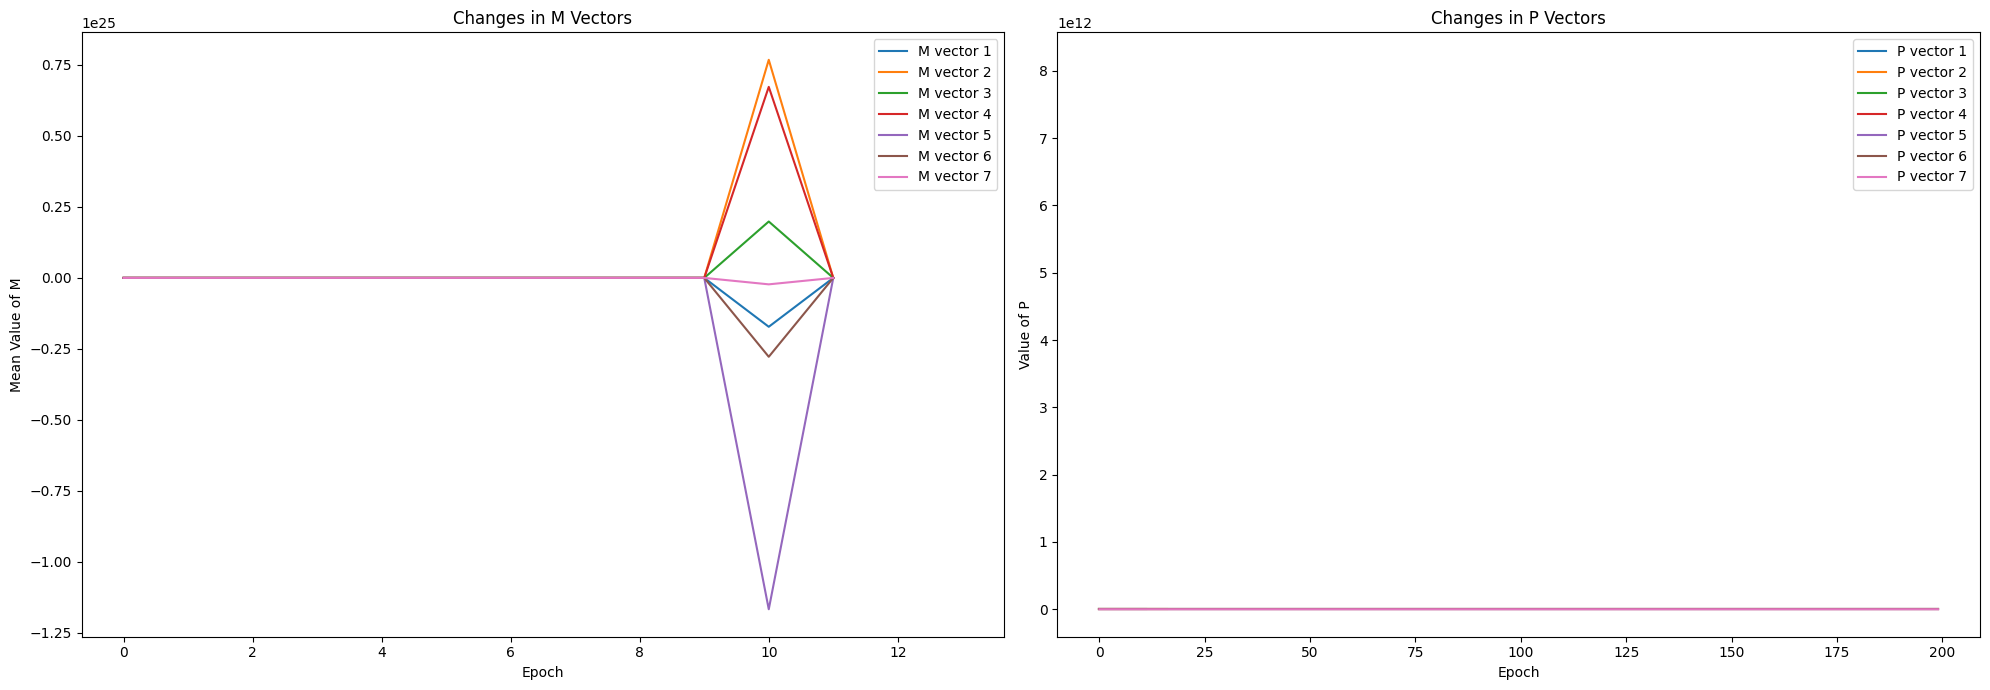

In [ ]:
# Визуализация изменений векторов M и P
epochs = len(M_history)

plt.figure(figsize=(20, 7))

# Плоты для M
for i in range(len(M_history[0])):
    plt.subplot(1, 2, 1)
    plt.plot([M_history[epoch][i].mean() for epoch in range(epochs)], label=f'M vector {i+1}')
plt.title('Changes in M Vectors')
plt.xlabel('Epoch')
plt.ylabel('Mean Value of M')
plt.legend()

# Плоты для P
for i in range(len(P_history[0])):
    plt.subplot(1, 2, 2)
    plt.plot([P_history[epoch][i] for epoch in range(epochs)], label=f'P vector {i+1}')
plt.title('Changes in P Vectors')
plt.xlabel('Epoch')
plt.ylabel('Value of P')
plt.legend()

plt.tight_layout()
plt.show()

### Подвал

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

class MappingLayer(nn.Module):
    def __init__(self, n, m):
        super(MappingLayer, self).__init__()
        self.n = n
        self.m = m
        self.M = nn.Parameter(torch.randn(m, n))
        self.P = nn.Parameter(torch.randn(m))
        self.beta1 = 0.01
        self.beta2 = 0.01
        self.beta3 = 0.01

    def forward(self, x):
        batch_size = x.size(0)
        distances = torch.sqrt(((x.unsqueeze(1) - self.M.unsqueeze(0)) ** 2).sum(dim=2)) + self.P
        min_indices = torch.argmin(distances, dim=1)
        delta_M = torch.zeros_like(self.M)
        delta_P = torch.zeros_like(self.P)

        # Ортогонализация
        for l in range(self.m):
            ortho_term = torch.zeros_like(self.M[l])
            for p in range(self.m):
                if p != l:
                    ortho_term += (self.M[l] - self.M[p]) * torch.dot(self.M[l], self.M[p])
            delta_M[l] += self.beta3 * ortho_term

        for i in range(batch_size):
            idx = min_indices[i]
            delta_M[idx] += self.beta1 * (x[i] - self.M[idx])
            delta_P[idx] += self.beta2 * distances[i, idx]

        self.M.data += delta_M
        self.P.data += delta_P
        return x

# Обновленный класс динамической сети с использованием слоя ортогонализации
class DynamicNet(nn.Module):
    def __init__(self, n, m):
        super(DynamicNet, self).__init__()

        layers = []
        # Первый слой
        layers.append(nn.Linear(2, n))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(n))
        layers.append(MappingLayer(n, int(0.7 * n)))

        # Промежуточные слои
        for _ in range(m - 2):
            layers.append(nn.Linear(n, n))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(n))
            layers.append(MappingLayer(n, int(0.7 * n)))

        # Последний слой
        layers.append(nn.Linear(n, 2))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(2))

        # Сохраняем слои в Sequential
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def validate(model, validation_data, criterion):
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for inputs, targets in validation_data:
            outputs = model(inputs.unsqueeze(0))
            loss = criterion(outputs, targets.unsqueeze(0))
            validation_loss += loss.item()
    return validation_loss / len(validation_data)

# Обучение нейронной сети с ранней остановкой
def train(model, criterion, optimizer, train_data, val_data, epochs=100, batch_size=1000, patience=3):
    model.train()
    params = []
    all_weights = []
    losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_no_improve = 0

    with torch.no_grad():
        for i in range(0, len(train_data), batch_size):
          inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
          inputs_batch = torch.stack(inputs_batch)
          targets_batch = torch.stack(targets_batch)
          outputs = model(inputs_batch)



    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i in range(0, len(train_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            targets_batch = torch.stack(targets_batch)

            optimizer.zero_grad()
            outputs = model(inputs_batch)
            loss = criterion(outputs, targets_batch)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Валидация после каждой эпохи
        val_loss = validate(model, val_data, criterion)
        val_losses.append(val_loss)

        # Проверка на улучшение валидационного качества
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f} {best_val_loss:.4}, Epochs_no_improve: {epochs_no_improve}")

        # Ранняя остановка
        if epochs_no_improve == patience:
            print("Early stopping triggered")
            break

    return all_weights, losses, val_losses

def get_metrics(model, test_data):
    model.eval()
    test_predictions = []
    test_targets = []
    batch_size = 10

    with torch.no_grad():
        for i in range(0, len(test_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            predictions = model(inputs_batch)

            test_predictions += [el for el in predictions.numpy()]
            test_targets += [el.numpy() for el in targets_batch]

    test_predictions = np.array(test_predictions)
    test_targets = np.array(test_targets)

    mae = mean_absolute_error(test_targets, test_predictions)
    rmse = mean_squared_error(test_targets, test_predictions, squared=False)
    return mae, rmse

# Генерация данных
def generate_examples(num_samples):
    X = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    Y = [np.random.uniform(-1, 1, (2)) for _ in range(num_samples)]
    return [(torch.tensor(X[i], dtype=torch.float32), torch.tensor(Y[i], dtype=torch.float32)) for i in range(num_samples)]

train_data = generate_examples(100000)
val_data = generate_examples(10000)
test_data = generate_examples(1000)

dict_metrics = {}

# Обучение модели
# for lays in [3, 5, 7, 9, 11]:
#     for elements in [10, 20, 30, 40, 50, 70, 90]:
#         model = DynamicNet(elements, lays)
#         print(f'model with {lays} lays and {elements} elements')
#         criterion = nn.MSELoss()
#         optimizer = optim.Adam(model.parameters(), lr=0.001)
#         all_weights, losses, val_losses = train(model, criterion, optimizer, train_data, val_data)
#         dict_metrics[f'model_{lays}_{elements}'] = {}
#         dict_metrics[f'model_{lays}_{elements}']['metrics'] = get_metrics(model, test_data)
#         dict_metrics[f'model_{lays}_{elements}']['epoch'] = len(val_losses)
#         dict_metrics[f'model_{lays}_{elements}']['val_losses'] = losses
#         dict_metrics[f'model_{lays}_{elements}']['model'] = model.state_dict().copy()
#         dict_metrics[f'model_{lays}_{elements}']['layers'] = lays
#         dict_metrics[f'model_{lays}_{elements}']['elements'] = elements
#         print(f'model with {lays} lays and {elements} elements' + 'metrics: ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][0]) + ' ' + str(dict_metrics[f'model_{lays}_{elements}']['metrics'][1]) )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(13)
np.random.seed(13)

# Генерация обучающей выборки
train_data = generate_examples(100000)

# Генерация тестовой выборки
test_data = generate_examples(1000)

dict_metrics = {}

for el in [10, 20, 30, 40, 50, 70]:
  # Создание модели
  model = SimpleNet(el)

  # Создание критерия и оптимизатора
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Обучение модели
  all_weights, losses  = train(model, criterion, optimizer, train_data)
  dict_metrics[el] = get_metrics(model, test_data)



  # # Построение графика изменения параметров
  # plt.figure(figsize=(20, 4))
  # plt.plot(losses)
  # # plt.title(f'Batch {i+1} Loss')
  # plt.xlabel('Epoch')
  # plt.ylabel('Loss')


# def fn(l):
#   result = []
#   for el in [list(el.flatten()) for el in l]:
#     result += el
#   return result

# plt.figure(figsize=(20, 4))
# num_plots = len(all_weights[0])

# # Создание подграфиков
# fig, axes = plt.subplots(num_plots, figsize=(20, 4*num_plots))

# # Отрисовка каждого элемента списка
# for i, ax in enumerate(axes):
#     ax.plot(np.array(all_weights)[:, i], label=labels[i])

#     ax.set_xlabel('Index')
#     ax.set_ylabel('Value')
#     ax.set_title(f'Evolution of Element {labels[i]}')
#     ax.legend()

# # Показать графики
# plt.tight_layout()
# plt.show()

In [ ]:
dict_metrics

{10: (0.05593676, 0.069881484),
 20: (0.062046327, 0.076733515),
 30: (0.079704806, 0.09667748),
 40: (0.089570016, 0.11908257),
 50: (0.094374076, 0.112932056),
 70: (0.08013625, 0.09435357)}

In [ ]:
dict_metrics

{10: (0.4119696, 0.5321631),
 20: (0.31716534, 0.4444787),
 30: (0.31356734, 0.4184962),
 40: (0.28782016, 0.37568146),
 50: (0.2758655, 0.35765862),
 70: (0.23647818, 0.309928)}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Генерация тестовой выборки
test_data = generate_examples(1000)

# Отключение режима обучения для модели
model.eval()
# Прогнозирование на тестовой выборке
test_predictions = []
test_targets = []
batch_size=10

# Прогнозирование на тестовой выборке
with torch.no_grad():
    for i in range(0, len(test_data), batch_size):
            inputs_batch, targets_batch = zip(*train_data[i:i+batch_size])
            inputs_batch = torch.stack(inputs_batch)
            # targets_batch = torch.stack(targets_batch)
            predictions = model(inputs_batch)

            test_predictions += [el for el in predictions.numpy()]
            test_targets += [el.numpy() for el in targets_batch]

# Преобразование предсказаний и истинных значений в numpy массив
test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

# Вычисление метрик
mae = mean_absolute_error(test_targets, test_predictions)
rmse = mean_squared_error(test_targets, test_predictions, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.49435868859291077
Root Mean Squared Error (RMSE): 0.6643400192260742


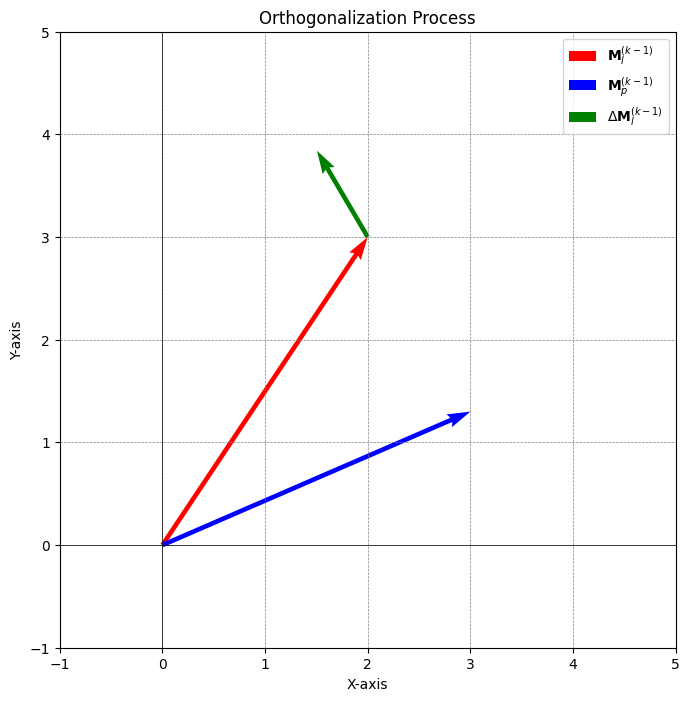

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define vectors
M_l = np.array([2, 3])
M_p = np.array([3, 1.3])
delta_M_l = 0.05 * (M_l - M_p) * np.dot(M_l, M_p)

# Plot vectors
fig, ax = plt.subplots(figsize=(10, 8))
ax.quiver(0, 0, M_l[0], M_l[1], angles='xy', scale_units='xy', scale=1, color='r', label='$\mathbf{M}_l^{(k-1)}$')
ax.quiver(0, 0, M_p[0], M_p[1], angles='xy', scale_units='xy', scale=1, color='b', label='$\mathbf{M}_p^{(k-1)}$')
ax.quiver(M_l[0], M_l[1], delta_M_l[0], delta_M_l[1], angles='xy', scale_units='xy', scale=1, color='g', label='$\Delta \mathbf{M}_l^{(k-1)}$')

# Set limits and labels
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.title("Orthogonalization Process")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show plot
plt.show()


### Далее